In [1]:
# 3ML stuff
from threeML import PluginPrototype, Model, Powerlaw, PointSource, JointLikelihood, DataList
from astromodels import Parameter

# I'm using gammapy's spectrum for now, but we'll change this to 3ML's.
from gammapy.modeling.models import PowerLawSpectralModel

# We'll yse histpy's Histogram and mhealpy's HealpixMap as the basis
# develop cosipy. These object (or a derivative) will be passed around by 
# the different modules.
from histpy import Histogram, Axis
from mhealpy import HealpixMap

# Needed for coordinate conversion.
# cosipy uses astropy coordinates, with a custom
# SpacecraftFrame (coordinate frame attached to COSI)
from astropy.coordinates import SkyCoord
from cosipy.coordinates import SpacecraftFrame, Attitude

# cosipy uses astropy units
import astropy.units as u
from astropy.time import Time

# Other cosipy modules. Eventually the data classes and 
# SC pos/attitude modules will be needed too.
from cosipy.response import FullDetectorResponse

#Other standard libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
from scipy import stats
import collections

# To deal with deep copy
import copy

# To load the saved 3ML fitting results
import astropy.io.fits as fits

11:11:09 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=986119;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=914912;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=192252;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=89291;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=947460;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=276305;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=635349;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=472942;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=463419;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=401264;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=58415;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=449112;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=916155;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=594851;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of F to 1e-99 because there was a postive transform   ]8;id=755542;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=723322;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=103574;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=761471;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

11:11:09 INFO      Starting 3ML!                                                                     ]8;id=636796;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=75846;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=21221;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=959534;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=480898;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=480430;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=385990;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=992406;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/__init__.py#40\40]8;;\

         WARNING   ROOT minimizer not available                                                ]8;id=882937;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=869508;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1345\1345]8;;\

         WARNING   Multinest minimizer not available                                           ]8;id=324268;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=814566;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

         WARNING   PyGMO is not available                                                      ]8;id=729986;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=226338;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

         WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=868489;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=283643;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=841161;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=609481;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=834194;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=480952;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   No fermitools installed                                              ]8;id=873382;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=770568;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

         WARNING   Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=536296;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=18447;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=44638;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=306868;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal     ]8;id=872992;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=655469;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

In [2]:
class COSILike(PluginPrototype):
    def __init__(self, name, dr, data, bkg, sc_orientation, **kwargs):
        """
        COSI 3ML plugin
        
        Parameters
        ----------
        name : str
            Plugin name e.g. "cosi". Needs to have a distinct name with respect to other plugins in the same analysis
        dr : Path
            Path to full detector response
        data: histpy.Histogram
            Binned data. Note: Eventually this should be a cosipy data class
        bkg: histpy.Histogram
            Binned background model. Note: Eventually this should be a cosipy data class
        sc_orientation: array
            Pair of timestamps (astropy.Time) and attitudes (scoord.Attitude) that describe
            the orientation of the spacecraft for the duration of the data included in
            the analysis. Note: this will eventually be handled by the SC location and
            orientation module
        """
        
        # create the hash for the nuisance parameters. We have none for now.
        nuisance_parameters = collections.OrderedDict()

        # call the prototype constructor. Boilerplate.
        super(COSILike, self).__init__(name, nuisance_parameters)

        # User inputs needed to compute the likelihood
        self._dr = FullDetectorResponse.open(dr)
        self._data = data
        self._bkg = bkg
        self._sc_orientation = sc_orientation
    
        # Place-holder for cached data.
        self._model = None
        self._source = None
        self._psr = None
        self._signal = None
        
    def set_model(self, model):
        """
        Set the model to be used in the joint minimization.
        
        Parameters:
            model: LikelihoodModel
                Any model supported by astromodel. However, this simple plugin only support single 
                point-sources with a power law spectrum
        """
        
        # Check for limitations
        if len(model.extended_sources) != 0 or len(model.particle_sources):
            raise RuntimeError("Only point source models are supported")
        
        sources = model.point_sources
        
        if len(sources) != 1:
            raise RuntimeError("Only one for now")
        
        # Get expectation
        for name, source in sources.items():

            if self._source is None:
                self._source = copy.deepcopy(source) # to avoid same memory issue
                     
            # Compute point source response for source position
            # See also the Detector Response and Source Injector tutorials
            if self._psr is None:
            
                coord = self._source.position.sky_coord
            
                dwell_time_map = self._get_dwell_time_map(coord)
            
                self._psr = self._dr.get_point_source_response(dwell_time_map)
                
            elif (source.position.ra._internal_value != self._source.position.ra._internal_value) or\
            (source.position.dec._internal_value != self._source.position.dec._internal_value):
                
                print('position change!')
                
                coord = source.position.sky_coord
            
                dwell_time_map = self._get_dwell_time_map(coord)
            
                self._psr = self._dr.get_point_source_response(dwell_time_map)
            
            # Caching source to self._source after position judgment
            if self._source is not None:
                self._source = copy.deepcopy(source)

            # Convolve with spectrum
            # See also the Detector Response and Source Injector tutorials
            spectrum = source.spectrum.main.shape
            
            # Here we translate to gammapy. We will make the detector response
            # accept 3ML models and there will be no need for this
            if not isinstance(spectrum, Powerlaw):
                raise RuntimeError("Only PowerLaw supported for now")

            spectrum = PowerLawSpectralModel(
                            index = -spectrum.index.value,
                            amplitude = spectrum.K.value * spectrum.K.unit,
                            reference = spectrum.piv.value * spectrum.piv.unit)
                
            self._signal = self._psr.get_expectation(spectrum).project(['Em', 'Phi', 'PsiChi'])
            
        # Cache
        self._model = model # They share the same memory!

    def get_log_like(self):

        # Recompute the expectation if any parameter in the model changed
        if self._model is None:
            log.error("You need to set the model first")
        
        self.set_model(self._model)
        
        # Compute "lambda" in the equations above
        expectation = self._signal.contents + self._bkg.contents
        
        data = self._data.contents # Into an array
        
        # Compute the log-likelihood from the equations above
        log_like = np.sum(np.log(np.power(expectation, data) * 
                             np.exp(-expectation) / 
                             factorial(data)))
        
        return log_like

    def inner_fit(self):
        """
        This fits nuisance parameters, but we have none for now.
        """
        
        return self.get_log_like()
    
    def _get_dwell_time_map(self, coord):
        """
        This will be eventually be provided by another module
        """
        
        # The dwell time map has the same pixelation (base) as the detector response.
        # We start with an empty map
        dwell_time_map = HealpixMap(base = self._dr, 
                                    unit = u.s, 
                                    coordsys = SpacecraftFrame())

        # Get timestamps and attitude values
        timestamps, attitudes = zip(*self._sc_orientation)
            
        for attitude,duration in zip(attitudes[:-1], np.diff(timestamps)):

            local_coord = coord.transform_to(SpacecraftFrame(attitude = attitude))

            # Here we add duration in between timestamps using interpolations
            pixels, weights = dwell_time_map.get_interp_weights(local_coord)

            for p,w in zip(pixels, weights):
                dwell_time_map[p] += w*duration.to(u.s)
        
        return dwell_time_map

In [3]:
# Inputs needed by the COSI plugin
# We'll use fake data from the "Source injector" tutorial
dr = "/Users/jasonpbu/Desktop/COSIpy/tutorial/FlatContinuumIsotropic.LowRes.binnedimaging.imagingresponse.area.nside8.cosipy.h5"
data = Histogram.open("/Users/jasonpbu/Desktop/COSIpy/tutorial/data.h5")
bkg = Histogram.open("/Users/jasonpbu/Desktop/COSIpy/tutorial/bkg.h5")
signal = Histogram.open("/Users/jasonpbu/Desktop/COSIpy/tutorial/signal.h5")

# 1s duration. Spacecraft aligned with the ICRS ([0,0,0,1] = Identity)
sc_orientation = [(Time('2025-01-01T13:02:01.00'), Attitude.from_quat([0,0,0,1])), 
                  (Time('2025-01-01T13:02:02.00'), Attitude.from_quat([0,0,0,1]))]

# Instantiate the plugin
# Note that we'll use 3x the signal we injected before. 
cosi = COSILike("cosi",
                dr = dr,
                data = bkg + 3*signal, 
                bkg = bkg, 
                sc_orientation = sc_orientation)

# Corresponding parameters, for reference
ra_inj = 20 # deg
dec_inj = 40 # deg
norm_inj = 3e-1 # 1/keV/cm2/s (3x the injected signal)
piv_inj = 1 # keV
index_inj = -1.7 

In [4]:
# Our model will contain a single source with a power law spectrum
spectrum = Powerlaw()

# Setting the parameter to something reasonable helps the 
# fitting to converge
spectrum.K.value = 1 # 1/keV/cm2/s
spectrum.piv.value = piv_inj # will be fixed 
spectrum.index.value = index_inj # will be fixed 

# Optional: change pivot energy
# The pivot value is arbitrary, ideally nothing should depend on it
# However, it is recommended to choose a value near the energy
# for which the detector is most sensitive ir onder to minimize
# the correlation between the normalization and spectral index.
# Try setting it to 500 keV and see how the results change
# piv =  500 #keV
# spectrum.K.value = spectrum(piv) # 1/keV/cm2/s
# spectrum.piv.value = piv # keV

# Point source instance, at the know location (from the "Source Injectior" tutorial)
source = PointSource("source", # The name of the source is arbitrary, but needs to be unique
                     ra = ra_inj, 
                     dec = dec_inj,
                     spectral_shape = spectrum)

# Adding the source to the model
# If we had multiple sources, we would do Model(source1, source2, ...)
model = Model(source)

# Optional: if you want to call get_log_like manually, then you
# also need to set the model manually. 3ML does this internanlly during the fit though
cosi.set_model(model)

In [5]:
# Checking default fix and free parameters
model.display(complete=True)

Model summary:
==============

                  N
Point sources     1
Extended sources  0
Particle sources  0

Free parameters (2):
--------------------

                                    value min_value max_value            unit
source.spectrum.main.Powerlaw.K       1.0       0.0    1000.0  keV-1 s-1 cm-2
source.spectrum.main.Powerlaw.index  -1.7     -10.0      10.0                

Fixed parameters (3):
---------------------

                                  value min_value max_value unit
source.position.ra                 20.0       0.0     360.0  deg
source.position.dec                40.0     -90.0      90.0  deg
source.spectrum.main.Powerlaw.piv   1.0      None      None  keV

Properties (0):
--------------------

(none)


Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

Linked functions (0):
----------------------

(none)

In [6]:
# Fix the Powerlaw index
source.spectrum.main.Powerlaw.index.fix = True

In [7]:
# Checking new fix and free parameters
model.display(complete=True)

Model summary:
==============

                  N
Point sources     1
Extended sources  0
Particle sources  0

Free parameters (1):
--------------------

                                value min_value max_value            unit
source.spectrum.main.Powerlaw.K   1.0       0.0    1000.0  keV-1 s-1 cm-2

Fixed parameters (4):
---------------------

                                    value min_value max_value unit
source.position.ra                   20.0       0.0     360.0  deg
source.position.dec                  40.0     -90.0      90.0  deg
source.spectrum.main.Powerlaw.piv     1.0      None      None  keV
source.spectrum.main.Powerlaw.index  -1.7     -10.0      10.0     

Properties (0):
--------------------

(none)


Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

Linked functions (0):
----------------------

(none)

In [8]:
# Gather all plugins. 
# If we had multiple instruments, we would do e.g. DataList(cosi, lat, hawc, ...)
plugins = DataList(cosi)

# Put model and pluging together
like = JointLikelihood(model, plugins, verbose = False)

# Maximum likelihood
like.fit()

11:11:10 INFO      set the minimizer to minuit                                             ]8;id=900494;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=835840;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

11:11:14 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=295250;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=160659;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Best fit values:

,result,unit
parameter,,
source.spectrum.main.Powerlaw.K,(3.00 -0.33 +0.4) x 10^-1,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
cosi,4540.459283
total,4540.459283


Values of statistical measures:

,statistical measures
AIC,9078.918565
BIC,9080.918565


(                                    value  negative_error  positive_error  \
 source.spectrum.main.Powerlaw.K  0.300021       -0.032702        0.038551   
 
                                     error             unit  
 source.spectrum.main.Powerlaw.K  0.035627  1 / (cm2 keV s)  ,
        -log(likelihood)
 cosi        4540.459283
 total       4540.459283)

In [9]:
# Changing RA to check psr really change
source.position.ra = 30

In [10]:
# Maximum likelihood
like.fit()

position change!


11:11:16 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=12136;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=873373;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Best fit values:

,result,unit
parameter,,
source.spectrum.main.Powerlaw.K,(2.77 -0.33 +0.4) x 10^-1,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
cosi,4548.361879
total,4548.361879


Values of statistical measures:

,statistical measures
AIC,9094.723757
BIC,9096.723757


(                                    value  negative_error  positive_error  \
 source.spectrum.main.Powerlaw.K  0.276952       -0.033829        0.036756   
 
                                     error             unit  
 source.spectrum.main.Powerlaw.K  0.035292  1 / (cm2 keV s)  ,
        -log(likelihood)
 cosi        4548.361879
 total       4548.361879)

In [11]:
# TS grid for all sky

# Using rad due to mollweide projection
ra_range = (-np.pi, np.pi) # rad
dec_range = (-np.pi/2, np.pi/2) # rad

log_like = Histogram(
    [Axis(np.linspace(*ra_range, 50), label = "ra"), 
     Axis(np.linspace(*dec_range, 25), label = "dec"),]
)

for i in range(log_like.axes['ra'].nbins):
    for j in range(log_like.axes['dec'].nbins):

        # Progress
        print(f"\rra = {i:2d}/{log_like.axes['ra'].nbins}   ", end = "")
        print(f"dec = {j:2d}/{log_like.axes['dec'].nbins}   ", end = "")

        # Changing the position parameters
        # Converting rad to deg due to RA and Dec in 3ML PointSource
        if log_like.axes['ra'].centers[i] < 0:
            source.position.ra = (log_like.axes['ra'].centers[i] + 2*np.pi) * (180/np.pi) # deg
        else:
            source.position.ra = (log_like.axes['ra'].centers[i]) * (180/np.pi) # deg
        source.position.dec = log_like.axes['dec'].centers[j] * (180/np.pi) # deg
        
        # Maximum likelihood
        like.fit(quiet=True)
        
        # Converting the min (- log likelihood) from 3ML 
        # to the max log likelihood for TS 
        log_like[i, j] = -like._current_minimum 

ra =  0/49   dec =  0/24   position change!


11:11:19 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=16259;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=763155;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  0/49   dec =  1/24   position change!


11:11:21 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=569374;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=675736;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  0/49   dec =  2/24   position change!


11:11:23 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=46420;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=360265;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  0/49   dec =  3/24   position change!


11:11:25 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=241223;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=505347;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  0/49   dec =  4/24   position change!


11:11:27 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=289939;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=86134;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  0/49   dec =  5/24   position change!


11:11:28 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=630259;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=826595;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  0/49   dec =  6/24   position change!


11:11:30 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=706677;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=187149;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  0/49   dec =  7/24   position change!


11:11:32 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=474910;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=360582;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  0/49   dec =  8/24   position change!


11:11:34 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=561359;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=269519;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  0/49   dec =  9/24   position change!


11:11:36 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=46540;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=827247;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  0/49   dec = 10/24   position change!


11:11:38 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=110002;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=33526;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  0/49   dec = 11/24   position change!


11:11:40 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=796555;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=765738;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  0/49   dec = 12/24   position change!


11:11:42 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=670725;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=260848;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  0/49   dec = 13/24   position change!


11:11:44 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=146632;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=436700;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  0/49   dec = 14/24   position change!


11:11:46 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=610422;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=231785;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  0/49   dec = 15/24   position change!


11:11:48 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=816400;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=233736;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  0/49   dec = 16/24   position change!


11:11:50 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=582347;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=797001;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  0/49   dec = 17/24   position change!


11:11:52 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=508759;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=654004;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  0/49   dec = 18/24   position change!


11:11:54 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=450311;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=918145;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  0/49   dec = 19/24   position change!


11:11:56 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=155490;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=492674;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  0/49   dec = 20/24   position change!


11:11:58 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=602415;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=291459;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  0/49   dec = 21/24   position change!


11:12:00 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=283312;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=988453;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  0/49   dec = 22/24   position change!


11:12:02 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=862404;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=622066;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  0/49   dec = 23/24   position change!


11:12:05 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=293614;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=531156;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  1/49   dec =  0/24   position change!


11:12:07 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=991286;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=34598;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  1/49   dec =  1/24   position change!


11:12:09 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=459644;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=511474;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  1/49   dec =  2/24   position change!


11:12:11 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=400997;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=913346;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  1/49   dec =  3/24   position change!


11:12:13 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=691245;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=553824;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  1/49   dec =  4/24   position change!


11:12:15 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=449777;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=685040;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  1/49   dec =  5/24   position change!


11:12:17 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=661661;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=60952;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  1/49   dec =  6/24   position change!


11:12:18 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=973394;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=792232;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  1/49   dec =  7/24   position change!


11:12:20 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=137628;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=4945;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  1/49   dec =  8/24   position change!


11:12:22 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=332326;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=618697;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  1/49   dec =  9/24   position change!


11:12:24 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=521022;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=763907;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  1/49   dec = 10/24   position change!


11:12:25 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=125461;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=781648;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  1/49   dec = 11/24   position change!


11:12:27 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=895586;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=597759;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  1/49   dec = 12/24   position change!


11:12:29 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=129468;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=203154;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  1/49   dec = 13/24   position change!


11:12:31 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=963134;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=379360;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  1/49   dec = 14/24   position change!


11:12:33 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=903893;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=205613;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  1/49   dec = 15/24   position change!


11:12:35 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=184851;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=41606;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  1/49   dec = 16/24   position change!


11:12:36 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=634307;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=570802;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  1/49   dec = 17/24   position change!


11:12:38 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=252367;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=265432;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  1/49   dec = 18/24   position change!


11:12:40 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=730188;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=857995;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  1/49   dec = 19/24   position change!


11:12:42 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=315771;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=570626;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  1/49   dec = 20/24   position change!


11:12:44 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=908261;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=950847;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  1/49   dec = 21/24   position change!


11:12:46 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=668178;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=357713;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  1/49   dec = 22/24   position change!


11:12:48 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=620868;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=310622;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  1/49   dec = 23/24   position change!


11:12:50 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=326561;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=244209;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  2/49   dec =  0/24   position change!


11:12:53 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=8773;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=596479;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  2/49   dec =  1/24   position change!


11:12:55 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=363609;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=11681;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  2/49   dec =  2/24   position change!


11:12:57 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=348051;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=72268;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  2/49   dec =  3/24   position change!


11:12:59 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=267052;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=853712;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  2/49   dec =  4/24   position change!


11:13:01 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=186502;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=846073;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  2/49   dec =  5/24   position change!


11:13:03 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=4743;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=413102;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  2/49   dec =  6/24   position change!


11:13:04 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=506141;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=876278;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  2/49   dec =  7/24   position change!


11:13:07 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=587607;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=552691;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  2/49   dec =  8/24   position change!


11:13:08 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=542079;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=509830;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  2/49   dec =  9/24   position change!


11:13:10 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=133573;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=429950;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  2/49   dec = 10/24   position change!


11:13:12 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=874293;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=193421;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  2/49   dec = 11/24   position change!


11:13:14 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=184520;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=290651;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  2/49   dec = 12/24   position change!


11:13:16 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=459326;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=952545;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  2/49   dec = 13/24   position change!


11:13:18 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=3890;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=262139;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  2/49   dec = 14/24   position change!


11:13:20 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=972941;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=626666;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  2/49   dec = 15/24   position change!


11:13:21 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=172267;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=564387;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  2/49   dec = 16/24   position change!


11:13:23 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=396538;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=579547;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  2/49   dec = 17/24   position change!


11:13:25 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=442773;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=210914;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  2/49   dec = 18/24   position change!


11:13:27 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=780604;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=815544;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  2/49   dec = 19/24   position change!


11:13:29 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=556913;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=576097;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  2/49   dec = 20/24   position change!


11:13:31 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=182946;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=39847;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  2/49   dec = 21/24   position change!


11:13:33 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=327784;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=140505;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  2/49   dec = 22/24   position change!


11:13:35 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=259191;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=546682;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  2/49   dec = 23/24   position change!


11:13:37 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=457188;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=144833;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  3/49   dec =  0/24   position change!


11:13:40 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=476225;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=516766;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  3/49   dec =  1/24   position change!


11:13:42 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=557414;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=902784;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  3/49   dec =  2/24   position change!


11:13:44 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=532387;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=454133;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  3/49   dec =  3/24   position change!


11:13:45 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=542081;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=445790;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  3/49   dec =  4/24   position change!


11:13:47 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=229483;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=804237;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  3/49   dec =  5/24   position change!


11:13:49 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=365850;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=321018;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  3/49   dec =  6/24   position change!


11:13:51 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=280766;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=178131;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  3/49   dec =  7/24   position change!


11:13:53 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=950054;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=408;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  3/49   dec =  8/24   position change!


11:13:54 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=546655;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=554008;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  3/49   dec =  9/24   position change!


11:13:56 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=948656;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=193089;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  3/49   dec = 10/24   position change!


11:13:58 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=802457;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=336623;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  3/49   dec = 11/24   position change!


11:13:59 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=128543;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=855023;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  3/49   dec = 12/24   position change!


11:14:01 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=806540;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=776379;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  3/49   dec = 13/24   position change!


11:14:03 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=468797;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=791197;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  3/49   dec = 14/24   position change!


11:14:05 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=585718;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=501111;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  3/49   dec = 15/24   position change!


11:14:07 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=612085;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=503939;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  3/49   dec = 16/24   position change!


11:14:09 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=418065;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=518317;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  3/49   dec = 17/24   position change!


11:14:10 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=692648;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=235970;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  3/49   dec = 18/24   position change!


11:14:13 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=794513;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=317866;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  3/49   dec = 19/24   position change!


11:14:14 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=90070;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=847028;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  3/49   dec = 20/24   position change!


11:14:16 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=159374;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=251265;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  3/49   dec = 21/24   position change!


11:14:18 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=873879;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=852052;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  3/49   dec = 22/24   position change!


11:14:20 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=875404;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=796119;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  3/49   dec = 23/24   position change!


11:14:22 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=680920;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=182202;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  4/49   dec =  0/24   position change!


11:14:24 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=25219;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=177798;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  4/49   dec =  1/24   position change!


11:14:26 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=690871;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=405558;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  4/49   dec =  2/24   position change!


11:14:28 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=750504;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=587817;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  4/49   dec =  3/24   position change!


11:14:30 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=262253;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=396897;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  4/49   dec =  4/24   position change!


11:14:32 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=166699;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=320988;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  4/49   dec =  5/24   position change!


11:14:34 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=686627;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=812969;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  4/49   dec =  6/24   position change!


11:14:35 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=525791;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=255923;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  4/49   dec =  7/24   position change!


11:14:37 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=713835;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=166550;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  4/49   dec =  8/24   position change!


11:14:39 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=993903;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=241357;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  4/49   dec =  9/24   position change!


11:14:41 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=854380;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=406974;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  4/49   dec = 10/24   position change!


11:14:43 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=261667;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=585951;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  4/49   dec = 11/24   position change!


11:14:45 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=236736;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=610578;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  4/49   dec = 12/24   position change!


11:14:46 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=66669;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=194166;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  4/49   dec = 13/24   position change!


11:14:48 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=825888;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=544007;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  4/49   dec = 14/24   position change!


11:14:50 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=534002;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=975362;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  4/49   dec = 15/24   position change!


11:14:52 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=372019;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=700838;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  4/49   dec = 16/24   position change!


11:14:54 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=382794;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=907630;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  4/49   dec = 17/24   position change!


11:14:56 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=431766;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=975767;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  4/49   dec = 18/24   position change!


11:14:57 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=259204;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=502820;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  4/49   dec = 19/24   position change!


11:14:59 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=84749;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=323157;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  4/49   dec = 20/24   position change!


11:15:01 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=53774;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=834854;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  4/49   dec = 21/24   position change!


11:15:03 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=824775;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=597085;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  4/49   dec = 22/24   position change!


11:15:05 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=717404;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=70650;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  4/49   dec = 23/24   position change!


11:15:07 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=567739;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=939611;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  5/49   dec =  0/24   position change!


11:15:09 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=794466;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=181949;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  5/49   dec =  1/24   position change!


11:15:11 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=486615;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=276363;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  5/49   dec =  2/24   position change!


11:15:13 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=88387;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=108400;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  5/49   dec =  3/24   position change!


11:15:15 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=546563;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=111707;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  5/49   dec =  4/24   position change!


11:15:16 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=153140;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=539072;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  5/49   dec =  5/24   position change!


11:15:18 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=49061;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=172715;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  5/49   dec =  6/24   position change!


11:15:20 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=294624;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=820087;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  5/49   dec =  7/24   position change!


11:15:22 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=449973;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=624006;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  5/49   dec =  8/24   position change!


11:15:24 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=423628;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=526696;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  5/49   dec =  9/24   position change!


11:15:25 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=813327;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=952312;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  5/49   dec = 10/24   position change!


11:15:27 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=843568;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=632342;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  5/49   dec = 11/24   position change!


11:15:29 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=19367;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=576707;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  5/49   dec = 12/24   position change!


11:15:31 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=502963;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=397081;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  5/49   dec = 13/24   position change!


11:15:33 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=750504;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=955412;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  5/49   dec = 14/24   position change!


11:15:35 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=407800;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=160049;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  5/49   dec = 15/24   position change!


11:15:36 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=648494;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=831646;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  5/49   dec = 16/24   position change!


11:15:38 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=452870;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=570730;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  5/49   dec = 17/24   position change!


11:15:40 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=933274;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=693630;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  5/49   dec = 18/24   position change!


11:15:42 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=895267;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=301448;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  5/49   dec = 19/24   position change!


11:15:44 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=759246;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=538185;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  5/49   dec = 20/24   position change!


11:15:46 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=59003;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=152136;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  5/49   dec = 21/24   position change!


11:15:48 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=555015;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=918921;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  5/49   dec = 22/24   position change!


11:15:50 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=323637;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=124938;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  5/49   dec = 23/24   position change!


11:15:52 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=697118;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=329640;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  6/49   dec =  0/24   position change!


11:15:54 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=837833;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=34380;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  6/49   dec =  1/24   position change!


11:15:56 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=208116;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=644494;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  6/49   dec =  2/24   position change!


11:15:58 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=370141;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=742836;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  6/49   dec =  3/24   position change!


11:16:00 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=644579;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=735241;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  6/49   dec =  4/24   position change!


11:16:02 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=236984;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=873623;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  6/49   dec =  5/24   position change!


11:16:03 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=996222;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=119400;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  6/49   dec =  6/24   position change!


11:16:05 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=114831;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=750721;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  6/49   dec =  7/24   position change!


11:16:07 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=737241;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=435558;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  6/49   dec =  8/24   position change!


11:16:09 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=536885;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=226538;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  6/49   dec =  9/24   position change!


11:16:11 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=44886;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=40676;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  6/49   dec = 10/24   position change!


11:16:13 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=74101;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=305848;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  6/49   dec = 11/24   position change!


11:16:15 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=308542;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=383208;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  6/49   dec = 12/24   position change!


11:16:16 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=712314;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=117590;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  6/49   dec = 13/24   position change!


11:16:18 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=479388;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=514848;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  6/49   dec = 14/24   position change!


11:16:20 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=500223;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=594458;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  6/49   dec = 15/24   position change!


11:16:22 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=497833;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=360313;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  6/49   dec = 16/24   position change!


11:16:24 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=409304;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=380911;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  6/49   dec = 17/24   position change!


11:16:25 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=427849;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=113323;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  6/49   dec = 18/24   position change!


11:16:28 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=137406;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=147749;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  6/49   dec = 19/24   position change!


11:16:29 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=561166;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=63224;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  6/49   dec = 20/24   position change!


11:16:32 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=73076;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=947722;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  6/49   dec = 21/24   position change!


11:16:33 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=956085;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=644518;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  6/49   dec = 22/24   position change!


11:16:35 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=364240;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=752302;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  6/49   dec = 23/24   position change!


11:16:37 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=7559;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=739096;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  7/49   dec =  0/24   position change!


11:16:40 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=247833;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=828442;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  7/49   dec =  1/24   position change!


11:16:42 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=624523;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=523629;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  7/49   dec =  2/24   position change!


11:16:43 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=609636;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=953852;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  7/49   dec =  3/24   position change!


11:16:45 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=475045;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=710761;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  7/49   dec =  4/24   position change!


11:16:47 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=496277;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=472955;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  7/49   dec =  5/24   position change!


11:16:48 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=377544;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=761487;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  7/49   dec =  6/24   position change!


11:16:51 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=225204;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=692427;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  7/49   dec =  7/24   position change!


11:16:52 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=35694;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=244212;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  7/49   dec =  8/24   position change!


11:16:54 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=551020;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=398310;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  7/49   dec =  9/24   position change!


11:16:56 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=434934;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=789590;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  7/49   dec = 10/24   position change!


11:16:57 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=78502;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=327263;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  7/49   dec = 11/24   position change!


11:16:59 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=599676;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=390850;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  7/49   dec = 12/24   position change!


11:17:01 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=514376;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=279647;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  7/49   dec = 13/24   position change!


11:17:03 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=199020;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=342312;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  7/49   dec = 14/24   position change!


11:17:05 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=955771;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=456018;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  7/49   dec = 15/24   position change!


11:17:07 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=725370;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=842870;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  7/49   dec = 16/24   position change!


11:17:09 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=887217;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=672037;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  7/49   dec = 17/24   position change!


11:17:11 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=515696;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=53208;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  7/49   dec = 18/24   position change!


11:17:12 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=792252;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=903127;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  7/49   dec = 19/24   position change!


11:17:14 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=892961;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=812286;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  7/49   dec = 20/24   position change!


11:17:17 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=667026;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=799714;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  7/49   dec = 21/24   position change!


11:17:19 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=269781;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=728399;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  7/49   dec = 22/24   position change!


11:17:21 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=455365;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=631119;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  7/49   dec = 23/24   position change!


11:17:24 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=652253;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=921598;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  8/49   dec =  0/24   position change!


11:17:26 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=682208;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=657199;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  8/49   dec =  1/24   position change!


11:17:29 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=430823;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=503552;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  8/49   dec =  2/24   position change!


11:17:31 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=776198;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=635959;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  8/49   dec =  3/24   position change!


11:17:33 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=35597;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=765930;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  8/49   dec =  4/24   position change!


11:17:35 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=874284;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=774101;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  8/49   dec =  5/24   position change!


11:17:36 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=574452;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=498553;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  8/49   dec =  6/24   position change!


11:17:38 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=496085;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=465581;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  8/49   dec =  7/24   position change!


11:17:40 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=495462;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=837498;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  8/49   dec =  8/24   position change!


11:17:42 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=996971;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=536132;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  8/49   dec =  9/24   position change!


11:17:44 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=872932;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=33336;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  8/49   dec = 10/24   position change!


11:17:46 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=304989;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=296719;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  8/49   dec = 11/24   position change!


11:17:48 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=307071;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=614266;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  8/49   dec = 12/24   position change!


11:17:50 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=228057;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=718097;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  8/49   dec = 13/24   position change!


11:17:52 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=814067;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=666974;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  8/49   dec = 14/24   position change!


11:17:54 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=544640;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=505310;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  8/49   dec = 15/24   position change!


11:17:56 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=112156;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=879574;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  8/49   dec = 16/24   position change!


11:17:57 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=484314;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=469664;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  8/49   dec = 17/24   position change!


11:17:59 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=557060;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=580503;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  8/49   dec = 18/24   position change!


11:18:01 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=916576;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=747169;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  8/49   dec = 19/24   position change!


11:18:03 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=399978;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=306017;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  8/49   dec = 20/24   position change!


11:18:05 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=68623;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=251954;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  8/49   dec = 21/24   position change!


11:18:07 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=613817;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=623049;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  8/49   dec = 22/24   position change!


11:18:09 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=745848;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=761745;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  8/49   dec = 23/24   position change!


11:18:11 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=925315;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=647245;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  9/49   dec =  0/24   position change!


11:18:13 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=185693;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=715623;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  9/49   dec =  1/24   position change!


11:18:16 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=602026;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=861175;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  9/49   dec =  2/24   position change!


11:18:17 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=861746;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=638801;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  9/49   dec =  3/24   position change!


11:18:19 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=78180;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=418801;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  9/49   dec =  4/24   position change!


11:18:21 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=826983;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=1611;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  9/49   dec =  5/24   position change!


11:18:23 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=285447;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=795369;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  9/49   dec =  6/24   position change!


11:18:24 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=332202;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=849581;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  9/49   dec =  7/24   position change!


11:18:26 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=818932;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=916536;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  9/49   dec =  8/24   position change!


11:18:28 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=50336;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=843555;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  9/49   dec =  9/24   position change!


11:18:30 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=483068;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=479876;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  9/49   dec = 10/24   position change!


11:18:32 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=406512;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=217574;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  9/49   dec = 11/24   position change!


11:18:34 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=204953;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=780281;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  9/49   dec = 12/24   position change!


11:18:36 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=772927;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=719141;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  9/49   dec = 13/24   position change!


11:18:37 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=887702;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=929667;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  9/49   dec = 14/24   position change!


11:18:39 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=168077;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=207080;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  9/49   dec = 15/24   position change!


11:18:41 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=706694;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=8286;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  9/49   dec = 16/24   position change!


11:18:43 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=355914;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=842055;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  9/49   dec = 17/24   position change!


11:18:45 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=405476;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=787492;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  9/49   dec = 18/24   position change!


11:18:47 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=337114;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=276811;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  9/49   dec = 19/24   position change!


11:18:49 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=559037;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=629808;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  9/49   dec = 20/24   position change!


11:18:51 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=702869;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=121470;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  9/49   dec = 21/24   position change!


11:18:53 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=319443;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=904606;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  9/49   dec = 22/24   position change!


11:18:55 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=886423;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=451262;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra =  9/49   dec = 23/24   position change!


11:18:57 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=965266;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=285767;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 10/49   dec =  0/24   position change!


11:18:59 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=944256;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=894609;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 10/49   dec =  1/24   position change!


11:19:01 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=526973;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=494469;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 10/49   dec =  2/24   position change!


11:19:03 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=61763;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=132606;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 10/49   dec =  3/24   position change!


11:19:05 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=804103;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=67932;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 10/49   dec =  4/24   position change!


11:19:07 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=677854;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=384220;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 10/49   dec =  5/24   position change!


11:19:09 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=499458;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=746522;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 10/49   dec =  6/24   position change!


11:19:10 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=679113;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=718237;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 10/49   dec =  7/24   position change!


11:19:13 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=936748;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=278774;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 10/49   dec =  8/24   position change!


11:19:14 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=949485;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=876885;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 10/49   dec =  9/24   position change!


11:19:16 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=189604;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=703332;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 10/49   dec = 10/24   position change!


11:19:18 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=263359;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=20110;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 10/49   dec = 11/24   position change!


11:19:20 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=668977;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=23233;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 10/49   dec = 12/24   position change!


11:19:21 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=541412;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=830323;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 10/49   dec = 13/24   position change!


11:19:23 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=594487;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=6826;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 10/49   dec = 14/24   position change!


11:19:25 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=765211;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=187058;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 10/49   dec = 15/24   position change!


11:19:27 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=564010;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=344656;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 10/49   dec = 16/24   position change!


11:19:29 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=854953;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=674798;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 10/49   dec = 17/24   position change!


11:19:31 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=163810;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=811374;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 10/49   dec = 18/24   position change!


11:19:33 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=3089;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=428622;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 10/49   dec = 19/24   position change!


11:19:35 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=171247;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=857563;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 10/49   dec = 20/24   position change!


11:19:37 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=602133;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=881098;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 10/49   dec = 21/24   position change!


11:19:39 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=96286;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=575754;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 10/49   dec = 22/24   position change!


11:19:41 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=923082;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=191068;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 10/49   dec = 23/24   position change!


11:19:43 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=875701;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=637031;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 11/49   dec =  0/24   position change!


11:19:45 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=272210;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=855108;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 11/49   dec =  1/24   position change!


11:19:47 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=327180;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=488308;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 11/49   dec =  2/24   position change!


11:19:49 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=341706;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=212798;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 11/49   dec =  3/24   position change!


11:19:50 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=784932;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=790407;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 11/49   dec =  4/24   position change!


11:19:52 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=440714;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=595750;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 11/49   dec =  5/24   position change!


11:19:54 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=697737;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=178872;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 11/49   dec =  6/24   position change!


11:19:56 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=230133;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=709391;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 11/49   dec =  7/24   position change!


11:19:58 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=792678;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=40630;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 11/49   dec =  8/24   position change!


11:20:00 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=670622;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=69094;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 11/49   dec =  9/24   position change!


11:20:02 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=928949;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=387936;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 11/49   dec = 10/24   position change!


11:20:03 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=398353;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=540660;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 11/49   dec = 11/24   position change!


11:20:05 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=881130;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=240969;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 11/49   dec = 12/24   position change!


11:20:07 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=123029;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=372781;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 11/49   dec = 13/24   position change!


11:20:09 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=11341;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=612789;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 11/49   dec = 14/24   position change!


11:20:11 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=205084;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=395193;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 11/49   dec = 15/24   position change!


11:20:13 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=679338;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=300927;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 11/49   dec = 16/24   position change!


11:20:15 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=876842;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=632464;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 11/49   dec = 17/24   position change!


11:20:17 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=693415;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=816032;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 11/49   dec = 18/24   position change!


11:20:20 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=771042;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=687917;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 11/49   dec = 19/24   position change!


11:20:21 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=584610;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=521597;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 11/49   dec = 20/24   position change!


11:20:23 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=886102;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=460810;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 11/49   dec = 21/24   position change!


11:20:25 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=346948;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=826734;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 11/49   dec = 22/24   position change!


11:20:27 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=548955;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=276788;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 11/49   dec = 23/24   position change!


11:20:29 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=322043;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=95978;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 12/49   dec =  0/24   position change!


11:20:32 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=227667;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=261400;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 12/49   dec =  1/24   position change!


11:20:33 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=52472;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=180180;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 12/49   dec =  2/24   position change!


11:20:35 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=469490;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=554425;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 12/49   dec =  3/24   position change!


11:20:37 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=588255;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=713596;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 12/49   dec =  4/24   position change!


11:20:39 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=579146;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=728250;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 12/49   dec =  5/24   position change!


11:20:41 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=587769;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=609997;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 12/49   dec =  6/24   position change!


11:20:43 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=956472;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=379605;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 12/49   dec =  7/24   position change!


11:20:45 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=865012;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=912921;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 12/49   dec =  8/24   position change!


11:20:47 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=52476;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=380442;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 12/49   dec =  9/24   position change!


11:20:49 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=260479;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=280377;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 12/49   dec = 10/24   position change!


11:20:50 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=849754;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=249131;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 12/49   dec = 11/24   position change!


11:20:52 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=619720;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=218857;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 12/49   dec = 12/24   position change!


11:20:54 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=261294;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=868323;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 12/49   dec = 13/24   position change!


11:20:56 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=447048;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=3044;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 12/49   dec = 14/24   position change!


11:20:58 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=456303;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=228737;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 12/49   dec = 15/24   position change!


11:20:59 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=335285;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=104159;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 12/49   dec = 16/24   position change!


11:21:02 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=386816;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=726350;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 12/49   dec = 17/24   position change!


11:21:04 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=817880;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=557407;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 12/49   dec = 18/24   position change!


11:21:05 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=509123;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=341092;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 12/49   dec = 19/24   position change!


11:21:07 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=844432;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=142399;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 12/49   dec = 20/24   position change!


11:21:09 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=943608;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=190841;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 12/49   dec = 21/24   position change!


11:21:11 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=486286;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=702420;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 12/49   dec = 22/24   position change!


11:21:13 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=919569;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=762513;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 12/49   dec = 23/24   position change!


11:21:15 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=786890;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=879514;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 13/49   dec =  0/24   position change!


11:21:17 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=396303;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=290306;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 13/49   dec =  1/24   position change!


11:21:19 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=183608;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=623590;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 13/49   dec =  2/24   position change!


11:21:21 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=794996;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=159182;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 13/49   dec =  3/24   position change!


11:21:22 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=296329;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=783801;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 13/49   dec =  4/24   position change!


11:21:25 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=903832;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=441554;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 13/49   dec =  5/24   position change!


11:21:26 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=939165;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=29207;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 13/49   dec =  6/24   position change!


11:21:28 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=598488;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=746139;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 13/49   dec =  7/24   position change!


11:21:30 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=189532;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=920245;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 13/49   dec =  8/24   position change!


11:21:32 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=18502;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=152630;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 13/49   dec =  9/24   position change!


11:21:34 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=118452;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=284340;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 13/49   dec = 10/24   position change!


11:21:35 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=552955;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=805632;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 13/49   dec = 11/24   position change!


11:21:37 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=96371;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=582697;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 13/49   dec = 12/24   position change!


11:21:39 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=486574;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=428618;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 13/49   dec = 13/24   position change!


11:21:41 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=6446;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=2978;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 13/49   dec = 14/24   position change!


11:21:43 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=798162;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=473843;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 13/49   dec = 15/24   position change!


11:21:44 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=396410;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=725582;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 13/49   dec = 16/24   position change!


11:21:47 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=664714;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=982523;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 13/49   dec = 17/24   position change!


11:21:49 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=316709;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=369405;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 13/49   dec = 18/24   position change!


11:21:51 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=630939;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=62658;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 13/49   dec = 19/24   position change!


11:21:52 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=781570;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=972842;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 13/49   dec = 20/24   position change!


11:21:54 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=260855;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=109076;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 13/49   dec = 21/24   position change!


11:21:56 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=507225;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=483877;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 13/49   dec = 22/24   position change!


11:21:58 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=796148;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=825798;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 13/49   dec = 23/24   position change!


11:22:00 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=506750;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=204323;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 14/49   dec =  0/24   position change!


11:22:02 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=417425;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=892679;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 14/49   dec =  1/24   position change!


11:22:04 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=479606;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=112025;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 14/49   dec =  2/24   position change!


11:22:06 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=209460;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=337039;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 14/49   dec =  3/24   position change!


11:22:08 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=694832;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=101440;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 14/49   dec =  4/24   position change!


11:22:10 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=957061;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=904474;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 14/49   dec =  5/24   position change!


11:22:11 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=751475;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=63884;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 14/49   dec =  6/24   position change!


11:22:13 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=969957;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=278094;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 14/49   dec =  7/24   position change!


11:22:15 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=189433;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=56061;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 14/49   dec =  8/24   position change!


11:22:17 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=15248;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=708692;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 14/49   dec =  9/24   position change!


11:22:19 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=578043;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=491990;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 14/49   dec = 10/24   position change!


11:22:20 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=756753;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=65173;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 14/49   dec = 11/24   position change!


11:22:22 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=713339;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=465462;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 14/49   dec = 12/24   position change!


11:22:24 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=494935;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=91864;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 14/49   dec = 13/24   position change!


11:22:26 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=710574;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=369038;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 14/49   dec = 14/24   position change!


11:22:28 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=932767;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=466764;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 14/49   dec = 15/24   position change!


11:22:30 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=702244;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=82042;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 14/49   dec = 16/24   position change!


11:22:32 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=702854;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=58035;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 14/49   dec = 17/24   position change!


11:22:33 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=296550;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=921961;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 14/49   dec = 18/24   position change!


11:22:36 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=634606;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=773564;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 14/49   dec = 19/24   position change!


11:22:37 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=739348;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=147049;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 14/49   dec = 20/24   position change!


11:22:39 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=953579;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=640658;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 14/49   dec = 21/24   position change!


11:22:41 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=480432;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=940756;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 14/49   dec = 22/24   position change!


11:22:43 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=840075;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=162332;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 14/49   dec = 23/24   position change!


11:22:45 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=146469;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=759698;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 15/49   dec =  0/24   position change!


11:22:48 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=104876;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=439734;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 15/49   dec =  1/24   position change!


11:22:50 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=945001;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=985131;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 15/49   dec =  2/24   position change!


11:22:52 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=662531;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=175943;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 15/49   dec =  3/24   position change!


11:22:53 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=768943;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=412624;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 15/49   dec =  4/24   position change!


11:22:55 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=506591;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=646947;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 15/49   dec =  5/24   position change!


11:22:57 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=260287;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=121155;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 15/49   dec =  6/24   position change!


11:22:58 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=312556;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=223633;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 15/49   dec =  7/24   position change!


11:23:00 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=221494;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=679369;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 15/49   dec =  8/24   position change!


11:23:02 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=981097;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=114175;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 15/49   dec =  9/24   position change!


11:23:04 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=369338;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=20700;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 15/49   dec = 10/24   position change!


11:23:05 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=676692;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=401558;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 15/49   dec = 11/24   position change!


11:23:07 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=757047;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=942517;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 15/49   dec = 12/24   position change!


11:23:09 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=81927;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=797588;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 15/49   dec = 13/24   position change!


11:23:12 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=826836;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=419520;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 15/49   dec = 14/24   position change!


11:23:14 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=665677;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=635738;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 15/49   dec = 15/24   position change!


11:23:16 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=657224;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=16057;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 15/49   dec = 16/24   position change!


11:23:18 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=966371;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=705159;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 15/49   dec = 17/24   position change!


11:23:20 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=135377;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=466623;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 15/49   dec = 18/24   position change!


11:23:21 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=921999;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=297576;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 15/49   dec = 19/24   position change!


11:23:23 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=182264;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=769801;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 15/49   dec = 20/24   position change!


11:23:25 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=825964;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=930712;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 15/49   dec = 21/24   position change!


11:23:27 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=185022;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=969590;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 15/49   dec = 22/24   position change!


11:23:28 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=981992;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=601884;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 15/49   dec = 23/24   position change!


11:23:31 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=154017;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=580039;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 16/49   dec =  0/24   position change!


11:23:33 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=420300;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=177242;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 16/49   dec =  1/24   position change!


11:23:35 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=454607;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=464671;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 16/49   dec =  2/24   position change!


11:23:37 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=850252;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=362720;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 16/49   dec =  3/24   position change!


11:23:39 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=988578;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=377994;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 16/49   dec =  4/24   position change!


11:23:40 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=649441;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=953106;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 16/49   dec =  5/24   position change!


11:23:43 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=281133;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=283456;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 16/49   dec =  6/24   position change!


11:23:45 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=668520;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=571109;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 16/49   dec =  7/24   position change!


11:23:47 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=990008;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=888851;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 16/49   dec =  8/24   position change!


11:23:49 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=210239;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=993821;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 16/49   dec =  9/24   position change!


11:23:50 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=831877;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=253727;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 16/49   dec = 10/24   position change!


11:23:52 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=566516;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=712188;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 16/49   dec = 11/24   position change!


11:23:54 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=252127;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=349327;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 16/49   dec = 12/24   position change!


11:23:56 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=569618;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=606399;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 16/49   dec = 13/24   position change!


11:23:58 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=267152;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=259591;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 16/49   dec = 14/24   position change!


11:24:00 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=336918;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=177999;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 16/49   dec = 15/24   position change!


11:24:01 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=50239;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=953008;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 16/49   dec = 16/24   position change!


11:24:03 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=770100;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=35533;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 16/49   dec = 17/24   position change!


11:24:05 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=46373;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=343894;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 16/49   dec = 18/24   position change!


11:24:06 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=547940;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=553897;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 16/49   dec = 19/24   position change!


11:24:08 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=598676;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=556584;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 16/49   dec = 20/24   position change!


11:24:10 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=984103;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=491531;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 16/49   dec = 21/24   position change!


11:24:12 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=145377;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=226111;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 16/49   dec = 22/24   position change!


11:24:14 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=386022;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=660567;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 16/49   dec = 23/24   position change!


11:24:16 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=193556;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=57369;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 17/49   dec =  0/24   position change!


11:24:18 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=307148;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=705632;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 17/49   dec =  1/24   position change!


11:24:20 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=609738;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=509918;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 17/49   dec =  2/24   position change!


11:24:22 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=471528;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=743239;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 17/49   dec =  3/24   position change!


11:24:24 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=151500;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=556632;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 17/49   dec =  4/24   position change!


11:24:26 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=192812;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=923766;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 17/49   dec =  5/24   position change!


11:24:28 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=326546;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=564581;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 17/49   dec =  6/24   position change!


11:24:29 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=727883;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=941873;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 17/49   dec =  7/24   position change!


11:24:31 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=237735;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=121738;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 17/49   dec =  8/24   position change!


11:24:33 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=717882;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=78826;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 17/49   dec =  9/24   position change!


11:24:35 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=161641;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=641661;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 17/49   dec = 10/24   position change!


11:24:36 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=7453;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=500803;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 17/49   dec = 11/24   position change!


11:24:38 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=626092;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=902929;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 17/49   dec = 12/24   position change!


11:24:40 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=22675;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=665984;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 17/49   dec = 13/24   position change!


11:24:42 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=536061;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=658612;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 17/49   dec = 14/24   position change!


11:24:43 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=392719;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=390035;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 17/49   dec = 15/24   position change!


11:24:45 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=559805;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=10653;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 17/49   dec = 16/24   position change!


11:24:47 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=912419;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=167985;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 17/49   dec = 17/24   position change!


11:24:49 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=867338;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=436970;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 17/49   dec = 18/24   position change!


11:24:51 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=598920;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=650809;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 17/49   dec = 19/24   position change!


11:24:52 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=491270;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=584412;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 17/49   dec = 20/24   position change!


11:24:54 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=160147;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=284963;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 17/49   dec = 21/24   position change!


11:24:56 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=160821;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=726944;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 17/49   dec = 22/24   position change!


11:24:58 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=674577;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=400979;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 17/49   dec = 23/24   position change!


11:25:00 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=323205;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=750490;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 18/49   dec =  0/24   position change!


11:25:02 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=176367;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=10472;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 18/49   dec =  1/24   position change!


11:25:04 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=941176;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=437743;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 18/49   dec =  2/24   position change!


11:25:06 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=728385;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=19468;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 18/49   dec =  3/24   position change!


11:25:08 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=536332;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=190579;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 18/49   dec =  4/24   position change!


11:25:09 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=538307;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=930161;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 18/49   dec =  5/24   position change!


11:25:11 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=315615;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=371580;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 18/49   dec =  6/24   position change!


11:25:13 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=636640;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=703842;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 18/49   dec =  7/24   position change!


11:25:15 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=51398;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=886793;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 18/49   dec =  8/24   position change!


11:25:17 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=957098;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=214026;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 18/49   dec =  9/24   position change!


11:25:19 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=804349;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=158887;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 18/49   dec = 10/24   position change!


11:25:21 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=384656;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=891168;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 18/49   dec = 11/24   position change!


11:25:23 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=510393;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=839718;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 18/49   dec = 12/24   position change!


11:25:25 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=684698;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=800061;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 18/49   dec = 13/24   position change!


11:25:26 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=346668;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=599906;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 18/49   dec = 14/24   position change!


11:25:28 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=886754;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=142676;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 18/49   dec = 15/24   position change!


11:25:30 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=365493;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=436342;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 18/49   dec = 16/24   position change!


11:25:32 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=586875;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=453873;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 18/49   dec = 17/24   position change!


11:25:34 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=155214;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=575901;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 18/49   dec = 18/24   position change!


11:25:36 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=857453;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=889842;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 18/49   dec = 19/24   position change!


11:25:38 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=155364;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=514260;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 18/49   dec = 20/24   position change!


11:25:40 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=918866;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=343841;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 18/49   dec = 21/24   position change!


11:25:42 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=584564;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=636403;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 18/49   dec = 22/24   position change!


11:25:43 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=32444;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=139672;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 18/49   dec = 23/24   position change!


11:25:45 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=524625;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=359401;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 19/49   dec =  0/24   position change!


11:25:48 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=957077;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=383310;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 19/49   dec =  1/24   position change!


11:25:50 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=231551;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=122048;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 19/49   dec =  2/24   position change!


11:25:52 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=519710;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=299024;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 19/49   dec =  3/24   position change!


11:25:54 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=120191;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=898420;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 19/49   dec =  4/24   position change!


11:25:55 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=976038;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=763465;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 19/49   dec =  5/24   position change!


11:25:57 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=329350;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=174824;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 19/49   dec =  6/24   position change!


11:25:59 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=686714;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=893016;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 19/49   dec =  7/24   position change!


11:26:01 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=412601;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=114497;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 19/49   dec =  8/24   position change!


11:26:03 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=971031;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=271176;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 19/49   dec =  9/24   position change!


11:26:04 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=722408;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=345377;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 19/49   dec = 10/24   position change!


11:26:06 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=154066;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=578365;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 19/49   dec = 11/24   position change!


11:26:08 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=251380;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=172256;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 19/49   dec = 12/24   position change!


11:26:10 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=652295;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=545600;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 19/49   dec = 13/24   position change!


11:26:12 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=885494;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=650533;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 19/49   dec = 14/24   position change!


11:26:13 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=998638;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=880531;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 19/49   dec = 15/24   position change!


11:26:15 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=777336;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=437374;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 19/49   dec = 16/24   position change!


11:26:17 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=921667;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=918791;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 19/49   dec = 17/24   position change!


11:26:19 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=6718;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=252959;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 19/49   dec = 18/24   position change!


11:26:21 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=477399;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=805655;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 19/49   dec = 19/24   position change!


11:26:23 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=139474;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=444172;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 19/49   dec = 20/24   position change!


11:26:24 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=407046;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=400051;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 19/49   dec = 21/24   position change!


11:26:26 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=86805;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=158747;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 19/49   dec = 22/24   position change!


11:26:28 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=544655;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=543872;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 19/49   dec = 23/24   position change!


11:26:30 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=481707;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=442402;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 20/49   dec =  0/24   position change!


11:26:32 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=919598;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=524192;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 20/49   dec =  1/24   position change!


11:26:34 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=263588;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=994663;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 20/49   dec =  2/24   position change!


11:26:36 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=876963;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=442048;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 20/49   dec =  3/24   position change!


11:26:38 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=475634;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=65969;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 20/49   dec =  4/24   position change!


11:26:40 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=316206;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=489346;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 20/49   dec =  5/24   position change!


11:26:42 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=219746;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=604521;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 20/49   dec =  6/24   position change!


11:26:44 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=915763;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=108819;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 20/49   dec =  7/24   position change!


11:26:46 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=183588;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=661884;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 20/49   dec =  8/24   position change!


11:26:48 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=152451;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=92435;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 20/49   dec =  9/24   position change!


11:26:50 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=827556;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=95452;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 20/49   dec = 10/24   position change!


11:26:52 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=511699;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=532676;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 20/49   dec = 11/24   position change!


11:26:54 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=725868;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=14107;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 20/49   dec = 12/24   position change!


11:26:56 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=486283;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=572111;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 20/49   dec = 13/24   position change!


11:26:58 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=379394;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=194496;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 20/49   dec = 14/24   position change!


11:26:59 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=181996;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=913847;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 20/49   dec = 15/24   position change!


11:27:01 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=747777;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=67141;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 20/49   dec = 16/24   position change!


11:27:03 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=777765;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=502224;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 20/49   dec = 17/24   position change!


11:27:05 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=234300;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=973127;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 20/49   dec = 18/24   position change!


11:27:07 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=505142;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=289816;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 20/49   dec = 19/24   position change!


11:27:09 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=577538;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=682524;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 20/49   dec = 20/24   position change!


11:27:10 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=115924;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=940569;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 20/49   dec = 21/24   position change!


11:27:12 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=879733;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=24023;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 20/49   dec = 22/24   position change!


11:27:14 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=221083;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=143334;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 20/49   dec = 23/24   position change!


11:27:16 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=503405;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=769319;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 21/49   dec =  0/24   position change!


11:27:18 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=40032;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=408447;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 21/49   dec =  1/24   position change!


11:27:20 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=892840;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=291209;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 21/49   dec =  2/24   position change!


11:27:22 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=989514;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=601105;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 21/49   dec =  3/24   position change!


11:27:24 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=852271;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=951907;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 21/49   dec =  4/24   position change!


11:27:26 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=80713;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=568090;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 21/49   dec =  5/24   position change!


11:27:28 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=812312;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=717444;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 21/49   dec =  6/24   position change!


11:27:30 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=702301;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=900024;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 21/49   dec =  7/24   position change!


11:27:32 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=153023;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=550024;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 21/49   dec =  8/24   position change!


11:27:34 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=78343;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=222039;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 21/49   dec =  9/24   position change!


11:27:36 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=218526;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=832371;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 21/49   dec = 10/24   position change!


11:27:38 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=118160;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=826207;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 21/49   dec = 11/24   position change!


11:27:39 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=114775;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=997797;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 21/49   dec = 12/24   position change!


11:27:41 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=959063;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=926247;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 21/49   dec = 13/24   position change!


11:27:43 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=451612;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=917033;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 21/49   dec = 14/24   position change!


11:27:45 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=849132;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=896866;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 21/49   dec = 15/24   position change!


11:27:47 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=310597;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=775919;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 21/49   dec = 16/24   position change!


11:27:49 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=163023;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=274859;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 21/49   dec = 17/24   position change!


11:27:51 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=585262;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=738711;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 21/49   dec = 18/24   position change!


11:27:53 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=338702;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=787961;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 21/49   dec = 19/24   position change!


11:27:55 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=702293;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=592349;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 21/49   dec = 20/24   position change!


11:27:57 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=542508;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=281723;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 21/49   dec = 21/24   position change!


11:27:59 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=660216;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=838739;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 21/49   dec = 22/24   position change!


11:28:01 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=690921;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=814310;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 21/49   dec = 23/24   position change!


11:28:03 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=793284;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=79360;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 22/49   dec =  0/24   position change!


11:28:05 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=303449;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=332575;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 22/49   dec =  1/24   position change!


11:28:07 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=622859;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=868733;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 22/49   dec =  2/24   position change!


11:28:09 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=532415;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=422525;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 22/49   dec =  3/24   position change!


11:28:11 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=363616;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=247575;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 22/49   dec =  4/24   position change!


11:28:13 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=24717;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=665667;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 22/49   dec =  5/24   position change!


11:28:15 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=372423;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=990455;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 22/49   dec =  6/24   position change!


11:28:16 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=162963;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=494853;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 22/49   dec =  7/24   position change!


11:28:19 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=524605;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=177787;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 22/49   dec =  8/24   position change!


11:28:20 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=252344;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=435521;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 22/49   dec =  9/24   position change!


11:28:22 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=900354;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=691517;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 22/49   dec = 10/24   position change!


11:28:24 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=890451;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=465156;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 22/49   dec = 11/24   position change!


11:28:26 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=942813;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=994388;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 22/49   dec = 12/24   position change!


11:28:28 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=405901;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=177557;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 22/49   dec = 13/24   position change!


11:28:30 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=522054;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=48612;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 22/49   dec = 14/24   position change!


11:28:32 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=872395;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=958667;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 22/49   dec = 15/24   position change!


11:28:34 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=683751;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=672025;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 22/49   dec = 16/24   position change!


11:28:36 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=208438;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=691744;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 22/49   dec = 17/24   position change!


11:28:38 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=510079;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=845264;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 22/49   dec = 18/24   position change!


11:28:40 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=842825;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=895374;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 22/49   dec = 19/24   position change!


11:28:42 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=432035;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=83854;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 22/49   dec = 20/24   position change!


11:28:43 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=973335;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=146385;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 22/49   dec = 21/24   position change!


11:28:46 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=953509;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=486211;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 22/49   dec = 22/24   position change!


11:28:48 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=529144;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=253274;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 22/49   dec = 23/24   position change!


11:28:50 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=907758;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=624116;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 23/49   dec =  0/24   position change!


11:28:52 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=442657;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=364186;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 23/49   dec =  1/24   position change!


11:28:54 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=382244;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=930714;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 23/49   dec =  2/24   position change!


11:28:56 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=85944;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=437294;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 23/49   dec =  3/24   position change!


11:28:58 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=49136;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=651698;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 23/49   dec =  4/24   position change!


11:29:00 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=86324;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=967221;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 23/49   dec =  5/24   position change!


11:29:02 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=713323;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=815254;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 23/49   dec =  6/24   position change!


11:29:04 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=110998;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=51806;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 23/49   dec =  7/24   position change!


11:29:06 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=620994;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=912080;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 23/49   dec =  8/24   position change!


11:29:09 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=195361;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=52195;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 23/49   dec =  9/24   position change!


11:29:11 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=67688;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=577358;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 23/49   dec = 10/24   position change!


11:29:13 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=194842;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=836909;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 23/49   dec = 11/24   position change!


11:29:15 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=401851;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=908219;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 23/49   dec = 12/24   position change!


11:29:18 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=15719;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=351641;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 23/49   dec = 13/24   position change!


11:29:20 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=963129;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=25078;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 23/49   dec = 14/24   position change!


11:29:22 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=401527;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=949045;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 23/49   dec = 15/24   position change!


11:29:25 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=91217;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=758581;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 23/49   dec = 16/24   position change!


11:29:27 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=468873;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=142422;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 23/49   dec = 17/24   position change!


11:29:29 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=488000;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=659062;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 23/49   dec = 18/24   position change!


11:29:31 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=549977;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=15724;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 23/49   dec = 19/24   position change!


11:29:33 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=713895;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=438076;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 23/49   dec = 20/24   position change!


11:29:35 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=465248;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=989691;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 23/49   dec = 21/24   position change!


11:29:37 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=34102;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=752704;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 23/49   dec = 22/24   position change!


11:29:39 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=196503;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=909189;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 23/49   dec = 23/24   position change!


11:29:41 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=210611;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=595789;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 24/49   dec =  0/24   position change!


11:29:44 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=362916;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=872260;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 24/49   dec =  1/24   position change!


11:29:46 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=59059;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=520271;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 24/49   dec =  2/24   position change!


11:29:48 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=112805;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=884055;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 24/49   dec =  3/24   position change!


11:29:50 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=555738;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=94811;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 24/49   dec =  4/24   position change!


11:29:51 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=468452;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=875711;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 24/49   dec =  5/24   position change!


11:29:54 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=132249;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=167744;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 24/49   dec =  6/24   position change!


11:29:55 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=481147;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=703023;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 24/49   dec =  7/24   position change!


11:29:57 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=305082;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=135496;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 24/49   dec =  8/24   position change!


11:29:59 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=18736;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=157718;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 24/49   dec =  9/24   position change!


11:30:01 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=940379;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=998138;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 24/49   dec = 10/24   position change!


11:30:02 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=581369;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=419486;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 24/49   dec = 11/24   position change!


11:30:04 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=431288;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=995467;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 24/49   dec = 12/24   position change!


11:30:06 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=592616;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=345600;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 24/49   dec = 13/24   position change!


11:30:08 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=738896;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=204496;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 24/49   dec = 14/24   position change!


11:30:10 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=667645;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=494304;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 24/49   dec = 15/24   position change!


11:30:12 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=846369;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=416703;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 24/49   dec = 16/24   position change!


11:30:14 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=876111;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=22411;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 24/49   dec = 17/24   position change!


11:30:16 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=545048;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=55875;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 24/49   dec = 18/24   position change!


11:30:18 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=812201;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=114667;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 24/49   dec = 19/24   position change!


11:30:20 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=156513;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=545398;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 24/49   dec = 20/24   position change!


11:30:22 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=514222;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=430364;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 24/49   dec = 21/24   position change!


11:30:24 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=657191;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=201742;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 24/49   dec = 22/24   position change!


11:30:26 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=206635;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=37880;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 24/49   dec = 23/24   position change!


11:30:28 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=344403;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=860390;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 25/49   dec =  0/24   position change!


11:30:30 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=156298;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=463141;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 25/49   dec =  1/24   position change!


11:30:32 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=650476;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=604621;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 25/49   dec =  2/24   position change!


11:30:34 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=565850;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=56815;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 25/49   dec =  3/24   position change!


11:30:36 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=737176;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=342403;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 25/49   dec =  4/24   position change!


11:30:38 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=458374;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=719069;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 25/49   dec =  5/24   position change!


11:30:40 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=309919;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=25612;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 25/49   dec =  6/24   position change!


11:30:42 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=784741;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=837694;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 25/49   dec =  7/24   position change!


11:30:44 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=684503;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=692300;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 25/49   dec =  8/24   position change!


11:30:46 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=307038;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=716330;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 25/49   dec =  9/24   position change!


11:30:48 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=266133;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=501223;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 25/49   dec = 10/24   position change!


11:30:50 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=979023;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=805253;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 25/49   dec = 11/24   position change!


11:30:52 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=792582;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=790036;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 25/49   dec = 12/24   position change!


11:30:54 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=370717;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=511579;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 25/49   dec = 13/24   position change!


11:30:56 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=466219;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=208652;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 25/49   dec = 14/24   position change!


11:30:58 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=595989;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=242547;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 25/49   dec = 15/24   position change!


11:31:00 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=799491;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=905725;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 25/49   dec = 16/24   position change!


11:31:03 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=746710;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=636290;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 25/49   dec = 17/24   position change!


11:31:04 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=562086;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=938403;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 25/49   dec = 18/24   position change!


11:31:06 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=639728;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=425893;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 25/49   dec = 19/24   position change!


11:31:08 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=151039;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=797570;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 25/49   dec = 20/24   position change!


11:31:10 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=139973;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=946395;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 25/49   dec = 21/24   position change!


11:31:12 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=547975;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=782146;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 25/49   dec = 22/24   position change!


11:31:14 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=567381;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=589637;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 25/49   dec = 23/24   position change!


11:31:16 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=781797;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=166366;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 26/49   dec =  0/24   position change!


11:31:18 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=827539;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=51287;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 26/49   dec =  1/24   position change!


11:31:20 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=650318;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=682090;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 26/49   dec =  2/24   position change!


11:31:22 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=927101;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=802494;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 26/49   dec =  3/24   position change!


11:31:24 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=92795;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=285618;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 26/49   dec =  4/24   position change!


11:31:26 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=352553;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=315838;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 26/49   dec =  5/24   position change!


11:31:28 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=109373;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=697713;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 26/49   dec =  6/24   position change!


11:31:30 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=213878;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=625046;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 26/49   dec =  7/24   position change!


11:31:33 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=9891;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=841419;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 26/49   dec =  8/24   position change!


11:31:35 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=670307;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=499222;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 26/49   dec =  9/24   position change!


11:31:37 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=326552;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=371308;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 26/49   dec = 10/24   position change!


11:31:39 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=61462;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=344323;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 26/49   dec = 11/24   position change!


11:31:41 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=266232;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=859687;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 26/49   dec = 12/24   position change!


11:31:43 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=2861;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=319307;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 26/49   dec = 13/24   position change!


11:31:45 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=838160;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=20263;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 26/49   dec = 14/24   position change!


11:31:47 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=361260;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=736617;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 26/49   dec = 15/24   position change!


11:31:49 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=998027;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=39244;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 26/49   dec = 16/24   position change!


11:31:51 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=669117;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=860561;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 26/49   dec = 17/24   position change!


11:31:53 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=550025;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=802009;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 26/49   dec = 18/24   position change!


11:31:55 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=93608;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=648024;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 26/49   dec = 19/24   position change!


11:31:57 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=149736;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=101120;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 26/49   dec = 20/24   position change!


11:31:59 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=194405;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=723729;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 26/49   dec = 21/24   position change!


11:32:01 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=268851;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=996844;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 26/49   dec = 22/24   position change!


11:32:03 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=501830;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=857775;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 26/49   dec = 23/24   position change!


11:32:05 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=582539;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=583270;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 27/49   dec =  0/24   position change!


11:32:08 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=145157;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=933749;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 27/49   dec =  1/24   position change!


11:32:10 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=768122;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=557111;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 27/49   dec =  2/24   position change!


11:32:12 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=22795;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=901751;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 27/49   dec =  3/24   position change!


11:32:14 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=993589;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=736017;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 27/49   dec =  4/24   position change!


11:32:16 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=383938;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=131255;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 27/49   dec =  5/24   position change!


11:32:18 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=57533;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=701553;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 27/49   dec =  6/24   position change!


11:32:20 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=814839;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=953531;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 27/49   dec =  7/24   position change!


11:32:22 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=283562;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=364057;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 27/49   dec =  8/24   position change!


11:32:24 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=679921;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=349381;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 27/49   dec =  9/24   position change!


11:32:26 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=908828;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=153524;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 27/49   dec = 10/24   position change!


11:32:28 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=74766;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=553071;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 27/49   dec = 11/24   position change!


11:32:30 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=555737;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=534981;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 27/49   dec = 12/24   position change!


11:32:31 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=910238;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=229604;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 27/49   dec = 13/24   position change!


11:32:33 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=788089;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=911411;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 27/49   dec = 14/24   position change!


11:32:36 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=477405;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=977824;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 27/49   dec = 15/24   position change!


11:32:38 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=601557;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=167148;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 27/49   dec = 16/24   position change!


11:32:40 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=140047;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=775140;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 27/49   dec = 17/24   position change!


11:32:42 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=520177;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=187136;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 27/49   dec = 18/24   position change!


11:32:44 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=607694;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=909613;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 27/49   dec = 19/24   position change!


11:32:46 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=335023;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=277336;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 27/49   dec = 20/24   position change!


11:32:48 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=70856;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=419049;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 27/49   dec = 21/24   position change!


11:32:50 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=687507;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=756797;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 27/49   dec = 22/24   position change!


11:32:52 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=878132;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=442735;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 27/49   dec = 23/24   position change!


11:32:54 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=757546;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=443155;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 28/49   dec =  0/24   position change!


11:32:57 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=634208;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=585726;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 28/49   dec =  1/24   position change!


11:32:59 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=588845;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=486274;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 28/49   dec =  2/24   position change!


11:33:01 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=690591;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=210708;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 28/49   dec =  3/24   position change!


11:33:03 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=196950;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=536084;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 28/49   dec =  4/24   position change!


11:33:04 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=225634;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=387835;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 28/49   dec =  5/24   position change!


11:33:07 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=353917;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=372585;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 28/49   dec =  6/24   position change!


11:33:08 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=594682;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=986139;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 28/49   dec =  7/24   position change!


11:33:10 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=313431;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=20572;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 28/49   dec =  8/24   position change!


11:33:13 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=197570;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=804498;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 28/49   dec =  9/24   position change!


11:33:14 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=234600;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=585804;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 28/49   dec = 10/24   position change!


11:33:16 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=660968;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=453806;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 28/49   dec = 11/24   position change!


11:33:18 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=82764;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=326325;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 28/49   dec = 12/24   position change!


11:33:20 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=265001;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=986767;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 28/49   dec = 13/24   position change!


11:33:22 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=550802;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=192881;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 28/49   dec = 14/24   position change!


11:33:24 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=642457;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=345725;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 28/49   dec = 15/24   position change!


11:33:26 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=980965;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=916652;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 28/49   dec = 16/24   position change!


11:33:29 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=22660;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=368388;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 28/49   dec = 17/24   position change!


11:33:31 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=314240;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=524402;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 28/49   dec = 18/24   position change!


11:33:33 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=217659;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=622634;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 28/49   dec = 19/24   position change!


11:33:35 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=977730;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=115232;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 28/49   dec = 20/24   position change!


11:33:37 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=932867;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=241621;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 28/49   dec = 21/24   position change!


11:33:39 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=116713;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=151378;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 28/49   dec = 22/24   position change!


11:33:41 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=254039;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=769371;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 28/49   dec = 23/24   position change!


11:33:43 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=742402;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=909765;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 29/49   dec =  0/24   position change!


11:33:45 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=783799;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=239602;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 29/49   dec =  1/24   position change!


11:33:47 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=601516;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=997988;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 29/49   dec =  2/24   position change!


11:33:49 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=441831;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=504641;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 29/49   dec =  3/24   position change!


11:33:51 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=610966;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=146125;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 29/49   dec =  4/24   position change!


11:33:53 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=706594;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=219821;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 29/49   dec =  5/24   position change!


11:33:55 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=523872;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=27661;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 29/49   dec =  6/24   position change!


11:33:56 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=878657;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=789793;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 29/49   dec =  7/24   position change!


11:33:58 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=739401;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=402212;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 29/49   dec =  8/24   position change!


11:34:00 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=915520;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=9737;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 29/49   dec =  9/24   position change!


11:34:02 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=214554;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=528574;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 29/49   dec = 10/24   position change!


11:34:04 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=268887;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=493635;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 29/49   dec = 11/24   position change!


11:34:06 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=691417;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=595124;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 29/49   dec = 12/24   position change!


11:34:08 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=116112;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=284622;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 29/49   dec = 13/24   position change!


11:34:10 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=388829;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=843072;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 29/49   dec = 14/24   position change!


11:34:12 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=759522;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=734863;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 29/49   dec = 15/24   position change!


11:34:14 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=598513;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=428085;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 29/49   dec = 16/24   position change!


11:34:17 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=917592;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=596402;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 29/49   dec = 17/24   position change!


11:34:18 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=681075;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=988383;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 29/49   dec = 18/24   position change!


11:34:20 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=453732;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=140427;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 29/49   dec = 19/24   position change!


11:34:22 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=573168;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=196880;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 29/49   dec = 20/24   position change!


11:34:25 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=790066;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=342229;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 29/49   dec = 21/24   position change!


11:34:27 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=916134;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=249284;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 29/49   dec = 22/24   position change!


11:34:28 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=927031;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=369104;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 29/49   dec = 23/24   position change!


11:34:30 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=271385;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=999280;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 30/49   dec =  0/24   position change!


11:34:32 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=631007;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=873002;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 30/49   dec =  1/24   position change!


11:34:34 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=646549;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=911201;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 30/49   dec =  2/24   position change!


11:34:36 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=610596;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=967603;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 30/49   dec =  3/24   position change!


11:34:38 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=841848;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=672884;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 30/49   dec =  4/24   position change!


11:34:40 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=987790;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=462738;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 30/49   dec =  5/24   position change!


11:34:42 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=93266;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=674188;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 30/49   dec =  6/24   position change!


11:34:44 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=525847;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=987726;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 30/49   dec =  7/24   position change!


11:34:46 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=849738;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=823231;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 30/49   dec =  8/24   position change!


11:34:48 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=766706;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=484450;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 30/49   dec =  9/24   position change!


11:34:50 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=413823;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=394643;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 30/49   dec = 10/24   position change!


11:34:52 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=826900;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=816856;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 30/49   dec = 11/24   position change!


11:34:54 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=361596;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=886074;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 30/49   dec = 12/24   position change!


11:34:56 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=266586;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=993578;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 30/49   dec = 13/24   position change!


11:34:58 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=456096;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=69379;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 30/49   dec = 14/24   position change!


11:35:00 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=505470;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=197457;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 30/49   dec = 15/24   position change!


11:35:02 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=391891;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=789904;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 30/49   dec = 16/24   position change!


11:35:04 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=246593;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=196943;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 30/49   dec = 17/24   position change!


11:35:06 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=113348;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=434040;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 30/49   dec = 18/24   position change!


11:35:08 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=69581;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=461945;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 30/49   dec = 19/24   position change!


11:35:10 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=51827;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=474174;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 30/49   dec = 20/24   position change!


11:35:12 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=805186;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=71090;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 30/49   dec = 21/24   position change!


11:35:15 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=466445;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=797550;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 30/49   dec = 22/24   position change!


11:35:17 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=164347;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=117644;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 30/49   dec = 23/24   position change!


11:35:19 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=600888;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=957420;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 31/49   dec =  0/24   position change!


11:35:21 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=309463;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=7425;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 31/49   dec =  1/24   position change!


11:35:23 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=699312;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=217278;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 31/49   dec =  2/24   position change!


11:35:25 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=145487;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=640899;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 31/49   dec =  3/24   position change!


11:35:27 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=984900;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=994064;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 31/49   dec =  4/24   position change!


11:35:29 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=398513;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=655936;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 31/49   dec =  5/24   position change!


11:35:31 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=124485;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=459841;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 31/49   dec =  6/24   position change!


11:35:33 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=730093;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=948049;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 31/49   dec =  7/24   position change!


11:35:35 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=492230;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=590523;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 31/49   dec =  8/24   position change!


11:35:37 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=681354;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=61134;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 31/49   dec =  9/24   position change!


11:35:39 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=593446;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=435168;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 31/49   dec = 10/24   position change!


11:35:41 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=527457;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=800507;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 31/49   dec = 11/24   position change!


11:35:43 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=357416;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=940952;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 31/49   dec = 12/24   position change!


11:35:45 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=594283;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=233451;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 31/49   dec = 13/24   position change!


11:35:47 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=986500;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=467472;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 31/49   dec = 14/24   position change!


11:35:50 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=651051;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=678793;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 31/49   dec = 15/24   position change!


11:35:52 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=571802;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=870816;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 31/49   dec = 16/24   position change!


11:35:54 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=662053;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=246751;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 31/49   dec = 17/24   position change!


11:35:56 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=751117;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=903185;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 31/49   dec = 18/24   position change!


11:35:57 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=385371;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=183585;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 31/49   dec = 19/24   position change!


11:36:00 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=577142;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=652387;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 31/49   dec = 20/24   position change!


11:36:01 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=15800;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=707880;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 31/49   dec = 21/24   position change!


11:36:03 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=301300;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=925921;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 31/49   dec = 22/24   position change!


11:36:06 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=960999;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=708374;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 31/49   dec = 23/24   position change!


11:36:08 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=739471;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=487925;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 32/49   dec =  0/24   position change!


11:36:10 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=375715;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=301361;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 32/49   dec =  1/24   position change!


11:36:12 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=460177;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=820841;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 32/49   dec =  2/24   position change!


11:36:14 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=805145;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=791048;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 32/49   dec =  3/24   position change!


11:36:16 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=16236;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=710777;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 32/49   dec =  4/24   position change!


11:36:18 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=674851;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=609264;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 32/49   dec =  5/24   position change!


11:36:19 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=782513;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=810403;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 32/49   dec =  6/24   position change!


11:36:21 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=316158;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=80707;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 32/49   dec =  7/24   position change!


11:36:23 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=391661;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=914173;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 32/49   dec =  8/24   position change!


11:36:25 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=211018;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=34803;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 32/49   dec =  9/24   position change!


11:36:27 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=669821;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=617393;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 32/49   dec = 10/24   position change!


11:36:29 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=775638;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=793258;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 32/49   dec = 11/24   position change!


11:36:30 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=281758;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=288803;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 32/49   dec = 12/24   position change!


11:36:33 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=758918;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=305100;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 32/49   dec = 13/24   position change!


11:36:35 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=793128;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=844668;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 32/49   dec = 14/24   position change!


11:36:36 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=878967;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=168622;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 32/49   dec = 15/24   position change!


11:36:38 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=637783;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=620284;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 32/49   dec = 16/24   position change!


11:36:40 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=804711;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=529100;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 32/49   dec = 17/24   position change!


11:36:42 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=938638;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=207901;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 32/49   dec = 18/24   position change!


11:36:44 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=872773;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=129861;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 32/49   dec = 19/24   position change!


11:36:46 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=744249;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=869571;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 32/49   dec = 20/24   position change!


11:36:48 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=844531;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=452205;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 32/49   dec = 21/24   position change!


11:36:50 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=904453;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=294760;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 32/49   dec = 22/24   position change!


11:36:52 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=521379;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=351940;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 32/49   dec = 23/24   position change!


11:36:54 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=679595;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=783316;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 33/49   dec =  0/24   position change!


11:36:56 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=33941;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=480379;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 33/49   dec =  1/24   position change!


11:36:58 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=586540;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=268854;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 33/49   dec =  2/24   position change!


11:37:00 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=94195;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=737592;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 33/49   dec =  3/24   position change!


11:37:02 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=403316;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=45586;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 33/49   dec =  4/24   position change!


11:37:04 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=441665;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=933928;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 33/49   dec =  5/24   position change!


11:37:06 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=228037;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=473313;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 33/49   dec =  6/24   position change!


11:37:07 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=538707;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=423801;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 33/49   dec =  7/24   position change!


11:37:09 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=165741;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=251227;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 33/49   dec =  8/24   position change!


11:37:11 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=989245;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=267597;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 33/49   dec =  9/24   position change!


11:37:13 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=732131;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=363397;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 33/49   dec = 10/24   position change!


11:37:15 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=738247;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=724547;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 33/49   dec = 11/24   position change!


11:37:17 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=598008;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=737942;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 33/49   dec = 12/24   position change!


11:37:19 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=519982;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=472421;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 33/49   dec = 13/24   position change!


11:37:21 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=933367;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=884506;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 33/49   dec = 14/24   position change!


11:37:23 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=255522;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=742983;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 33/49   dec = 15/24   position change!


11:37:24 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=373406;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=461416;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 33/49   dec = 16/24   position change!


11:37:27 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=252204;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=796759;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 33/49   dec = 17/24   position change!


11:37:29 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=838049;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=86550;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 33/49   dec = 18/24   position change!


11:37:30 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=345833;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=553364;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 33/49   dec = 19/24   position change!


11:37:32 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=593087;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=901177;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 33/49   dec = 20/24   position change!


11:37:34 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=79049;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=769561;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 33/49   dec = 21/24   position change!


11:37:36 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=869591;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=222692;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 33/49   dec = 22/24   position change!


11:37:37 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=44353;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=915459;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 33/49   dec = 23/24   position change!


11:37:40 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=543614;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=138517;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 34/49   dec =  0/24   position change!


11:37:42 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=1014;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=75203;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 34/49   dec =  1/24   position change!


11:37:44 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=576654;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=653215;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 34/49   dec =  2/24   position change!


11:37:45 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=825994;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=462334;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 34/49   dec =  3/24   position change!


11:37:47 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=994279;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=369616;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 34/49   dec =  4/24   position change!


11:37:49 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=712528;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=358435;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 34/49   dec =  5/24   position change!


11:37:51 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=40520;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=347757;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 34/49   dec =  6/24   position change!


11:37:53 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=788352;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=442782;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 34/49   dec =  7/24   position change!


11:37:55 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=691084;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=501402;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 34/49   dec =  8/24   position change!


11:37:57 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=192925;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=885561;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 34/49   dec =  9/24   position change!


11:37:59 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=862147;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=820000;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 34/49   dec = 10/24   position change!


11:38:00 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=789356;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=646916;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 34/49   dec = 11/24   position change!


11:38:02 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=280996;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=913357;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 34/49   dec = 12/24   position change!


11:38:04 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=345002;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=39227;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 34/49   dec = 13/24   position change!


11:38:06 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=101132;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=905181;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 34/49   dec = 14/24   position change!


11:38:08 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=171774;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=544369;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 34/49   dec = 15/24   position change!


11:38:10 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=363939;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=792360;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 34/49   dec = 16/24   position change!


11:38:12 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=702037;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=111111;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 34/49   dec = 17/24   position change!


11:38:14 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=229393;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=686409;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 34/49   dec = 18/24   position change!


11:38:16 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=580386;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=384004;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 34/49   dec = 19/24   position change!


11:38:18 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=862016;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=305464;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 34/49   dec = 20/24   position change!


11:38:20 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=980986;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=207855;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 34/49   dec = 21/24   position change!


11:38:22 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=582711;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=697723;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 34/49   dec = 22/24   position change!


11:38:24 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=827882;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=48773;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 34/49   dec = 23/24   position change!


11:38:26 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=785316;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=59017;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 35/49   dec =  0/24   position change!


11:38:28 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=949530;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=534130;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 35/49   dec =  1/24   position change!


11:38:30 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=705155;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=682138;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 35/49   dec =  2/24   position change!


11:38:32 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=636183;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=83841;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 35/49   dec =  3/24   position change!


11:38:34 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=139062;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=10906;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 35/49   dec =  4/24   position change!


11:38:36 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=81235;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=927427;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 35/49   dec =  5/24   position change!


11:38:38 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=689237;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=607478;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 35/49   dec =  6/24   position change!


11:38:39 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=993882;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=568166;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 35/49   dec =  7/24   position change!


11:38:41 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=485209;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=822150;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 35/49   dec =  8/24   position change!


11:38:43 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=699174;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=515365;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 35/49   dec =  9/24   position change!


11:38:44 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=662779;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=661289;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 35/49   dec = 10/24   position change!


11:38:46 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=596343;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=928390;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 35/49   dec = 11/24   position change!


11:38:48 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=829252;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=727485;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 35/49   dec = 12/24   position change!


11:38:50 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=761428;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=830816;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 35/49   dec = 13/24   position change!


11:38:52 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=35796;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=670687;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 35/49   dec = 14/24   position change!


11:38:54 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=250976;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=949974;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 35/49   dec = 15/24   position change!


11:38:56 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=933164;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=694448;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 35/49   dec = 16/24   position change!


11:38:58 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=995369;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=786232;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 35/49   dec = 17/24   position change!


11:39:00 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=623358;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=693042;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 35/49   dec = 18/24   position change!


11:39:02 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=770380;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=361135;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 35/49   dec = 19/24   position change!


11:39:04 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=799605;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=874380;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 35/49   dec = 20/24   position change!


11:39:06 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=840190;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=471003;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 35/49   dec = 21/24   position change!


11:39:08 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=240894;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=513037;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 35/49   dec = 22/24   position change!


11:39:10 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=328156;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=12614;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 35/49   dec = 23/24   position change!


11:39:12 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=742802;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=90312;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 36/49   dec =  0/24   position change!


11:39:14 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=510208;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=782761;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 36/49   dec =  1/24   position change!


11:39:16 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=836462;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=964261;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 36/49   dec =  2/24   position change!


11:39:18 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=9772;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=385175;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 36/49   dec =  3/24   position change!


11:39:20 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=189749;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=481815;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 36/49   dec =  4/24   position change!


11:39:22 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=755740;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=813329;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 36/49   dec =  5/24   position change!


11:39:24 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=191009;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=309792;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 36/49   dec =  6/24   position change!


11:39:26 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=59048;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=707482;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 36/49   dec =  7/24   position change!


11:39:27 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=134408;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=313160;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 36/49   dec =  8/24   position change!


11:39:29 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=425807;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=821645;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 36/49   dec =  9/24   position change!


11:39:31 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=67783;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=356477;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 36/49   dec = 10/24   position change!


11:39:33 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=671472;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=211828;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 36/49   dec = 11/24   position change!


11:39:35 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=197066;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=390377;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 36/49   dec = 12/24   position change!


11:39:37 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=563570;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=147052;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 36/49   dec = 13/24   position change!


11:39:38 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=977629;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=947961;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 36/49   dec = 14/24   position change!


11:39:41 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=41671;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=294619;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 36/49   dec = 15/24   position change!


11:39:42 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=477346;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=233616;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 36/49   dec = 16/24   position change!


11:39:44 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=937416;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=937196;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 36/49   dec = 17/24   position change!


11:39:46 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=17070;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=613966;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 36/49   dec = 18/24   position change!


11:39:48 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=169318;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=242110;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 36/49   dec = 19/24   position change!


11:39:50 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=276023;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=250609;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 36/49   dec = 20/24   position change!


11:39:52 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=167665;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=72229;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 36/49   dec = 21/24   position change!


11:39:54 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=533562;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=661453;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 36/49   dec = 22/24   position change!


11:39:56 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=133245;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=201411;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 36/49   dec = 23/24   position change!


11:39:58 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=375228;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=434507;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 37/49   dec =  0/24   position change!


11:40:00 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=405262;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=940532;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 37/49   dec =  1/24   position change!


11:40:02 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=689090;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=787573;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 37/49   dec =  2/24   position change!


11:40:04 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=139815;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=598355;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 37/49   dec =  3/24   position change!


11:40:06 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=802116;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=765787;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 37/49   dec =  4/24   position change!


11:40:08 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=591055;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=935643;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 37/49   dec =  5/24   position change!


11:40:10 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=589026;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=376936;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 37/49   dec =  6/24   position change!


11:40:11 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=504645;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=93186;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 37/49   dec =  7/24   position change!


11:40:14 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=279646;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=495127;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 37/49   dec =  8/24   position change!


11:40:15 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=718375;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=400598;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 37/49   dec =  9/24   position change!


11:40:17 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=877830;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=328907;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 37/49   dec = 10/24   position change!


11:40:19 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=857711;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=907366;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 37/49   dec = 11/24   position change!


11:40:21 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=215507;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=539333;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 37/49   dec = 12/24   position change!


11:40:22 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=817211;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=200395;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 37/49   dec = 13/24   position change!


11:40:24 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=995221;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=885736;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 37/49   dec = 14/24   position change!


11:40:26 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=989070;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=943562;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 37/49   dec = 15/24   position change!


11:40:28 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=619004;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=346286;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 37/49   dec = 16/24   position change!


11:40:30 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=33662;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=634359;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 37/49   dec = 17/24   position change!


11:40:32 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=708118;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=750423;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 37/49   dec = 18/24   position change!


11:40:34 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=647289;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=526085;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 37/49   dec = 19/24   position change!


11:40:36 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=894468;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=254840;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 37/49   dec = 20/24   position change!


11:40:38 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=132563;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=875318;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 37/49   dec = 21/24   position change!


11:40:40 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=897706;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=100675;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 37/49   dec = 22/24   position change!


11:40:42 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=502566;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=371813;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 37/49   dec = 23/24   position change!


11:40:44 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=695037;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=112995;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 38/49   dec =  0/24   position change!


11:40:46 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=389744;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=824147;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 38/49   dec =  1/24   position change!


11:40:48 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=384353;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=560171;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 38/49   dec =  2/24   position change!


11:40:50 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=889671;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=631962;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 38/49   dec =  3/24   position change!


11:40:52 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=510215;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=290602;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 38/49   dec =  4/24   position change!


11:40:54 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=802155;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=494114;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 38/49   dec =  5/24   position change!


11:40:55 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=380394;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=573433;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 38/49   dec =  6/24   position change!


11:40:58 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=204966;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=28966;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 38/49   dec =  7/24   position change!


11:40:59 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=374215;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=703646;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 38/49   dec =  8/24   position change!


11:41:01 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=39738;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=162951;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 38/49   dec =  9/24   position change!


11:41:03 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=146290;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=628185;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 38/49   dec = 10/24   position change!


11:41:05 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=835544;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=184972;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 38/49   dec = 11/24   position change!


11:41:06 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=321123;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=621166;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 38/49   dec = 12/24   position change!


11:41:08 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=923461;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=848504;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 38/49   dec = 13/24   position change!


11:41:11 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=611817;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=112309;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 38/49   dec = 14/24   position change!


11:41:13 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=135837;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=281380;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 38/49   dec = 15/24   position change!


11:41:14 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=114260;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=133504;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 38/49   dec = 16/24   position change!


11:41:17 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=600675;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=100420;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 38/49   dec = 17/24   position change!


11:41:18 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=946105;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=103694;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 38/49   dec = 18/24   position change!


11:41:21 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=376751;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=415983;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 38/49   dec = 19/24   position change!


11:41:23 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=94838;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=101309;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 38/49   dec = 20/24   position change!


11:41:24 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=364817;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=76481;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 38/49   dec = 21/24   position change!


11:41:27 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=127061;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=248531;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 38/49   dec = 22/24   position change!


11:41:29 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=676038;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=131375;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 38/49   dec = 23/24   position change!


11:41:31 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=24237;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=541829;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 39/49   dec =  0/24   position change!


11:41:33 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=740115;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=341722;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 39/49   dec =  1/24   position change!


11:41:36 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=571637;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=462835;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 39/49   dec =  2/24   position change!


11:41:38 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=488251;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=8961;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 39/49   dec =  3/24   position change!


11:41:40 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=729329;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=660610;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 39/49   dec =  4/24   position change!


11:41:42 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=444519;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=740090;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 39/49   dec =  5/24   position change!


11:41:43 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=212616;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=49977;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 39/49   dec =  6/24   position change!


11:41:45 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=710467;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=995140;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 39/49   dec =  7/24   position change!


11:41:47 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=369521;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=707138;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 39/49   dec =  8/24   position change!


11:41:49 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=492186;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=698218;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 39/49   dec =  9/24   position change!


11:41:51 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=679184;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=204646;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 39/49   dec = 10/24   position change!


11:41:53 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=466411;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=946339;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 39/49   dec = 11/24   position change!


11:41:54 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=972772;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=591710;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 39/49   dec = 12/24   position change!


11:41:56 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=792558;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=934229;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 39/49   dec = 13/24   position change!


11:41:58 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=555455;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=922624;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 39/49   dec = 14/24   position change!


11:42:00 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=978658;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=663591;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 39/49   dec = 15/24   position change!


11:42:02 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=272163;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=758947;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 39/49   dec = 16/24   position change!


11:42:04 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=484768;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=94847;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 39/49   dec = 17/24   position change!


11:42:06 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=979677;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=547711;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 39/49   dec = 18/24   position change!


11:42:08 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=250856;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=869315;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 39/49   dec = 19/24   position change!


11:42:10 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=660650;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=488899;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 39/49   dec = 20/24   position change!


11:42:12 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=6536;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=937184;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 39/49   dec = 21/24   position change!


11:42:14 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=903146;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=967439;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 39/49   dec = 22/24   position change!


11:42:16 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=846382;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=365628;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 39/49   dec = 23/24   position change!


11:42:19 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=161613;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=295485;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 40/49   dec =  0/24   position change!


11:42:21 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=861574;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=627168;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 40/49   dec =  1/24   position change!


11:42:23 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=341142;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=225744;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 40/49   dec =  2/24   position change!


11:42:25 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=184231;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=9978;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 40/49   dec =  3/24   position change!


11:42:27 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=26381;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=148623;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 40/49   dec =  4/24   position change!


11:42:29 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=776969;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=884852;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 40/49   dec =  5/24   position change!


11:42:30 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=942221;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=47048;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 40/49   dec =  6/24   position change!


11:42:32 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=384335;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=890384;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 40/49   dec =  7/24   position change!


11:42:35 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=787675;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=441826;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 40/49   dec =  8/24   position change!


11:42:36 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=645471;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=946701;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 40/49   dec =  9/24   position change!


11:42:38 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=395048;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=508762;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 40/49   dec = 10/24   position change!


11:42:40 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=51386;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=448744;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 40/49   dec = 11/24   position change!


11:42:42 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=62619;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=624295;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 40/49   dec = 12/24   position change!


11:42:44 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=133578;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=251212;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 40/49   dec = 13/24   position change!


11:42:45 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=52545;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=793647;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 40/49   dec = 14/24   position change!


11:42:47 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=224765;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=889520;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 40/49   dec = 15/24   position change!


11:42:49 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=495325;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=289505;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 40/49   dec = 16/24   position change!


11:42:51 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=452100;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=681146;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 40/49   dec = 17/24   position change!


11:42:53 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=836355;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=426910;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 40/49   dec = 18/24   position change!


11:42:55 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=433022;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=878912;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 40/49   dec = 19/24   position change!


11:42:57 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=447516;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=645354;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 40/49   dec = 20/24   position change!


11:42:59 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=830862;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=793876;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 40/49   dec = 21/24   position change!


11:43:00 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=334485;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=451362;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 40/49   dec = 22/24   position change!


11:43:02 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=652137;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=716296;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 40/49   dec = 23/24   position change!


11:43:05 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=415804;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=859914;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 41/49   dec =  0/24   position change!


11:43:07 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=632855;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=637964;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 41/49   dec =  1/24   position change!


11:43:09 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=943710;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=161136;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 41/49   dec =  2/24   position change!


11:43:10 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=911982;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=249258;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 41/49   dec =  3/24   position change!


11:43:12 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=129144;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=118979;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 41/49   dec =  4/24   position change!


11:43:14 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=157162;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=981234;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 41/49   dec =  5/24   position change!


11:43:16 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=717871;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=780691;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 41/49   dec =  6/24   position change!


11:43:17 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=448325;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=97211;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 41/49   dec =  7/24   position change!


11:43:19 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=253285;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=78559;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 41/49   dec =  8/24   position change!


11:43:21 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=716627;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=276733;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 41/49   dec =  9/24   position change!


11:43:22 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=758328;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=927607;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 41/49   dec = 10/24   position change!


11:43:24 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=200455;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=329958;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 41/49   dec = 11/24   position change!


11:43:26 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=793884;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=804880;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 41/49   dec = 12/24   position change!


11:43:28 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=320527;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=556247;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 41/49   dec = 13/24   position change!


11:43:30 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=509638;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=368872;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 41/49   dec = 14/24   position change!


11:43:32 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=450191;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=385620;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 41/49   dec = 15/24   position change!


11:43:33 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=153888;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=377790;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 41/49   dec = 16/24   position change!


11:43:35 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=687074;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=569721;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 41/49   dec = 17/24   position change!


11:43:37 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=813733;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=894972;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 41/49   dec = 18/24   position change!


11:43:39 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=480203;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=975411;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 41/49   dec = 19/24   position change!


11:43:41 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=204513;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=976044;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 41/49   dec = 20/24   position change!


11:43:43 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=383999;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=38137;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 41/49   dec = 21/24   position change!


11:43:45 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=482169;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=214839;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 41/49   dec = 22/24   position change!


11:43:46 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=497565;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=614639;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 41/49   dec = 23/24   position change!


11:43:48 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=345391;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=704531;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 42/49   dec =  0/24   position change!


11:43:51 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=400198;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=617399;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 42/49   dec =  1/24   position change!


11:43:53 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=204717;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=69577;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 42/49   dec =  2/24   position change!


11:43:55 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=303576;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=301269;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 42/49   dec =  3/24   position change!


11:43:56 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=892043;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=408753;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 42/49   dec =  4/24   position change!


11:43:58 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=544088;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=876162;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 42/49   dec =  5/24   position change!


11:44:00 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=633079;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=556486;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 42/49   dec =  6/24   position change!


11:44:02 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=338544;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=37016;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 42/49   dec =  7/24   position change!


11:44:04 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=275420;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=686090;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 42/49   dec =  8/24   position change!


11:44:05 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=884498;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=865098;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 42/49   dec =  9/24   position change!


11:44:07 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=253113;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=267962;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 42/49   dec = 10/24   position change!


11:44:09 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=320110;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=981215;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 42/49   dec = 11/24   position change!


11:44:11 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=258843;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=35266;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 42/49   dec = 12/24   position change!


11:44:13 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=445676;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=43570;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 42/49   dec = 13/24   position change!


11:44:14 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=303705;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=988638;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 42/49   dec = 14/24   position change!


11:44:17 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=820451;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=546522;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 42/49   dec = 15/24   position change!


11:44:18 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=260860;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=944579;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 42/49   dec = 16/24   position change!


11:44:20 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=120467;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=59878;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 42/49   dec = 17/24   position change!


11:44:22 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=244670;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=99029;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 42/49   dec = 18/24   position change!


11:44:24 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=495155;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=12286;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 42/49   dec = 19/24   position change!


11:44:26 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=647027;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=492815;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 42/49   dec = 20/24   position change!


11:44:28 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=480021;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=459830;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 42/49   dec = 21/24   position change!


11:44:30 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=637746;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=432457;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 42/49   dec = 22/24   position change!


11:44:31 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=209643;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=336091;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 42/49   dec = 23/24   position change!


11:44:33 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=376096;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=793834;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 43/49   dec =  0/24   position change!


11:44:36 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=794656;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=514921;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 43/49   dec =  1/24   position change!


11:44:38 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=556273;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=314065;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 43/49   dec =  2/24   position change!


11:44:40 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=978026;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=438319;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 43/49   dec =  3/24   position change!


11:44:42 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=382733;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=40765;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 43/49   dec =  4/24   position change!


11:44:44 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=652560;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=961710;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 43/49   dec =  5/24   position change!


11:44:45 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=910446;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=237970;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 43/49   dec =  6/24   position change!


11:44:47 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=917156;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=902454;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 43/49   dec =  7/24   position change!


11:44:49 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=105333;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=656319;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 43/49   dec =  8/24   position change!


11:44:51 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=692799;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=980145;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 43/49   dec =  9/24   position change!


11:44:53 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=111941;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=615027;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 43/49   dec = 10/24   position change!


11:44:55 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=700126;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=314657;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 43/49   dec = 11/24   position change!


11:44:56 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=974422;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=457946;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 43/49   dec = 12/24   position change!


11:44:58 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=302549;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=153326;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 43/49   dec = 13/24   position change!


11:45:00 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=304648;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=684880;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 43/49   dec = 14/24   position change!


11:45:02 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=250734;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=350040;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 43/49   dec = 15/24   position change!


11:45:03 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=48937;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=403902;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 43/49   dec = 16/24   position change!


11:45:05 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=840087;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=558376;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 43/49   dec = 17/24   position change!


11:45:07 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=952328;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=479000;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 43/49   dec = 18/24   position change!


11:45:09 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=110934;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=164930;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 43/49   dec = 19/24   position change!


11:45:11 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=838397;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=149448;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 43/49   dec = 20/24   position change!


11:45:13 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=856303;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=900195;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 43/49   dec = 21/24   position change!


11:45:15 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=104590;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=399606;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 43/49   dec = 22/24   position change!


11:45:16 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=117241;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=378186;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 43/49   dec = 23/24   position change!


11:45:18 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=788627;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=845080;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 44/49   dec =  0/24   position change!


11:45:21 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=473342;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=138551;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 44/49   dec =  1/24   position change!


11:45:22 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=129646;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=260520;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 44/49   dec =  2/24   position change!


11:45:24 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=783369;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=653893;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 44/49   dec =  3/24   position change!


11:45:26 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=153723;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=765662;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 44/49   dec =  4/24   position change!


11:45:28 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=480431;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=683993;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 44/49   dec =  5/24   position change!


11:45:29 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=621387;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=204907;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 44/49   dec =  6/24   position change!


11:45:31 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=454613;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=533466;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 44/49   dec =  7/24   position change!


11:45:33 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=303776;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=188108;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 44/49   dec =  8/24   position change!


11:45:35 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=560075;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=270187;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 44/49   dec =  9/24   position change!


11:45:36 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=854955;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=977730;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 44/49   dec = 10/24   position change!


11:45:38 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=225083;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=577565;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 44/49   dec = 11/24   position change!


11:45:40 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=386719;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=662977;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 44/49   dec = 12/24   position change!


11:45:42 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=959359;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=187573;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 44/49   dec = 13/24   position change!


11:45:43 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=369506;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=557070;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 44/49   dec = 14/24   position change!


11:45:46 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=344210;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=542888;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 44/49   dec = 15/24   position change!


11:45:47 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=854585;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=642324;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 44/49   dec = 16/24   position change!


11:45:49 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=590011;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=446148;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 44/49   dec = 17/24   position change!


11:45:51 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=194985;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=67966;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 44/49   dec = 18/24   position change!


11:45:53 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=854735;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=380338;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 44/49   dec = 19/24   position change!


11:45:55 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=628772;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=337398;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 44/49   dec = 20/24   position change!


11:45:57 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=255306;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=835746;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 44/49   dec = 21/24   position change!


11:45:59 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=149071;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=371127;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 44/49   dec = 22/24   position change!


11:46:00 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=697520;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=562695;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 44/49   dec = 23/24   position change!


11:46:02 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=157165;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=216495;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 45/49   dec =  0/24   position change!


11:46:05 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=98130;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=990136;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 45/49   dec =  1/24   position change!


11:46:07 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=655147;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=631978;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 45/49   dec =  2/24   position change!


11:46:09 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=756341;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=620826;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 45/49   dec =  3/24   position change!


11:46:11 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=642986;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=763841;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 45/49   dec =  4/24   position change!


11:46:12 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=313411;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=884120;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 45/49   dec =  5/24   position change!


11:46:15 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=679208;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=475931;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 45/49   dec =  6/24   position change!


11:46:16 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=745007;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=171255;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 45/49   dec =  7/24   position change!


11:46:18 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=963182;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=708478;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 45/49   dec =  8/24   position change!


11:46:20 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=354059;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=472715;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 45/49   dec =  9/24   position change!


11:46:22 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=887278;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=719882;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 45/49   dec = 10/24   position change!


11:46:24 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=968718;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=139569;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 45/49   dec = 11/24   position change!


11:46:25 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=540768;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=203478;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 45/49   dec = 12/24   position change!


11:46:27 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=76169;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=652111;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 45/49   dec = 13/24   position change!


11:46:29 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=202610;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=232290;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 45/49   dec = 14/24   position change!


11:46:31 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=264611;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=39496;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 45/49   dec = 15/24   position change!


11:46:33 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=76107;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=662781;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 45/49   dec = 16/24   position change!


11:46:35 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=307286;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=548285;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 45/49   dec = 17/24   position change!


11:46:36 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=522529;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=192645;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 45/49   dec = 18/24   position change!


11:46:39 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=495161;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=158833;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 45/49   dec = 19/24   position change!


11:46:40 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=124619;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=536478;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 45/49   dec = 20/24   position change!


11:46:42 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=723098;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=596246;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 45/49   dec = 21/24   position change!


11:46:44 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=663962;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=645199;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 45/49   dec = 22/24   position change!


11:46:46 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=219336;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=632318;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 45/49   dec = 23/24   position change!


11:46:48 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=113267;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=760126;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 46/49   dec =  0/24   position change!


11:46:51 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=444640;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=147750;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 46/49   dec =  1/24   position change!


11:46:53 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=845075;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=48315;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 46/49   dec =  2/24   position change!


11:46:55 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=145084;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=379214;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 46/49   dec =  3/24   position change!


11:46:57 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=712736;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=196707;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 46/49   dec =  4/24   position change!


11:46:58 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=683026;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=961876;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 46/49   dec =  5/24   position change!


11:47:00 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=293003;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=601383;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 46/49   dec =  6/24   position change!


11:47:02 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=254526;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=500462;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 46/49   dec =  7/24   position change!


11:47:04 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=373025;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=700927;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 46/49   dec =  8/24   position change!


11:47:05 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=108006;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=194647;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 46/49   dec =  9/24   position change!


11:47:07 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=332577;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=792068;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 46/49   dec = 10/24   position change!


11:47:09 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=564677;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=46544;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 46/49   dec = 11/24   position change!


11:47:11 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=771167;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=519927;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 46/49   dec = 12/24   position change!


11:47:13 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=183848;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=475740;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 46/49   dec = 13/24   position change!


11:47:15 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=868122;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=868354;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 46/49   dec = 14/24   position change!


11:47:17 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=562986;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=884371;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 46/49   dec = 15/24   position change!


11:47:19 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=81570;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=396125;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 46/49   dec = 16/24   position change!


11:47:21 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=387842;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=56552;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 46/49   dec = 17/24   position change!


11:47:23 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=409346;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=953085;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 46/49   dec = 18/24   position change!


11:47:25 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=435967;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=591827;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 46/49   dec = 19/24   position change!


11:47:27 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=724711;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=606016;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 46/49   dec = 20/24   position change!


11:47:29 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=585098;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=302184;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 46/49   dec = 21/24   position change!


11:47:31 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=551225;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=358154;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 46/49   dec = 22/24   position change!


11:47:33 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=715695;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=746142;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 46/49   dec = 23/24   position change!


11:47:35 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=228283;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=611495;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 47/49   dec =  0/24   position change!


11:47:38 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=123604;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=254216;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 47/49   dec =  1/24   position change!


11:47:40 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=496746;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=914993;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 47/49   dec =  2/24   position change!


11:47:42 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=940983;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=848111;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 47/49   dec =  3/24   position change!


11:47:44 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=359586;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=353032;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 47/49   dec =  4/24   position change!


11:47:46 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=630191;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=344926;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 47/49   dec =  5/24   position change!


11:47:48 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=214316;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=855689;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 47/49   dec =  6/24   position change!


11:47:49 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=823301;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=961711;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 47/49   dec =  7/24   position change!


11:47:51 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=56285;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=268947;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 47/49   dec =  8/24   position change!


11:47:53 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=860650;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=391672;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 47/49   dec =  9/24   position change!


11:47:55 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=702922;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=406640;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 47/49   dec = 10/24   position change!


11:47:57 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=138995;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=64857;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 47/49   dec = 11/24   position change!


11:47:58 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=743057;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=791814;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 47/49   dec = 12/24   position change!


11:48:00 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=673937;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=97138;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 47/49   dec = 13/24   position change!


11:48:02 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=483455;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=697528;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 47/49   dec = 14/24   position change!


11:48:04 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=667002;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=920061;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 47/49   dec = 15/24   position change!


11:48:06 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=241603;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=915345;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 47/49   dec = 16/24   position change!


11:48:07 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=737779;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=769459;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 47/49   dec = 17/24   position change!


11:48:09 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=633995;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=791599;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 47/49   dec = 18/24   position change!


11:48:11 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=695154;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=835977;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 47/49   dec = 19/24   position change!


11:48:13 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=561494;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=887090;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 47/49   dec = 20/24   position change!


11:48:15 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=760140;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=678967;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 47/49   dec = 21/24   position change!


11:48:17 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=817163;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=71407;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 47/49   dec = 22/24   position change!


11:48:18 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=902111;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=65643;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 47/49   dec = 23/24   position change!


11:48:21 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=132590;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=540278;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 48/49   dec =  0/24   position change!


11:48:23 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=692979;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=580459;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 48/49   dec =  1/24   position change!


11:48:25 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=248297;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=767251;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 48/49   dec =  2/24   position change!


11:48:27 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=31642;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=651750;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 48/49   dec =  3/24   position change!


11:48:29 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=751373;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=766470;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 48/49   dec =  4/24   position change!


11:48:31 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=112851;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=785330;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 48/49   dec =  5/24   position change!


11:48:33 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=9597;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=399223;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 48/49   dec =  6/24   position change!


11:48:34 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=822719;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=55342;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 48/49   dec =  7/24   position change!


11:48:36 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=6832;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=275953;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 48/49   dec =  8/24   position change!


11:48:38 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=658537;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=46007;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 48/49   dec =  9/24   position change!


11:48:40 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=791662;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=405732;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 48/49   dec = 10/24   position change!


11:48:42 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=872603;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=880833;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 48/49   dec = 11/24   position change!


11:48:44 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=683898;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=981337;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 48/49   dec = 12/24   position change!


11:48:46 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=389751;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=574906;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 48/49   dec = 13/24   position change!


11:48:47 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=245341;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=688647;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 48/49   dec = 14/24   position change!


11:48:49 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=565769;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=154729;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 48/49   dec = 15/24   position change!


11:48:51 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=699700;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=753347;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 48/49   dec = 16/24   position change!


11:48:53 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=306960;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=548102;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 48/49   dec = 17/24   position change!


11:48:55 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=445995;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=3810;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 48/49   dec = 18/24   position change!


11:48:57 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=788903;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=261515;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 48/49   dec = 19/24   position change!


11:48:59 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=517726;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=811190;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 48/49   dec = 20/24   position change!


11:49:01 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=962099;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=949215;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 48/49   dec = 21/24   position change!


11:49:03 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=246757;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=433297;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 48/49   dec = 22/24   position change!


11:49:05 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=941914;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=545924;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

ra = 48/49   dec = 23/24   position change!


11:49:07 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=760380;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=174744;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

In [12]:
# Set the normalization to 0, that is, background-only null-hypothesis
spectrum.K.value = spectrum.K.min_value # min_value is a very small value, approx 0. However, it can't be exactly 0 for some internal numerical reason

# Maximum likelihood
like.fit(quiet=True)

# Compute the likelihood
log_like0 = cosi.get_log_like()

In [13]:
ts = 2*(log_like - log_like0)

# Getting the maximum
# Note that, in our case, since log_like0 is a constant,
# max(TS) = 2
argmax = np.unravel_index(np.argmax(ts), ts.nbins)

ts_max = ts[argmax]

# And converting to significance based on Wilk's theorem
print(f"Expected significance: {stats.norm.isf(stats.chi2.sf(ts_max, df = 2)):.1f} sigma")

Expected significance: 10.4 sigma


In [14]:
# Saving ts as .h5 file
ts.write('ts_RA_Dec_freeNorm_3ML.h5', overwrite = True)

# Loading .h5 file and checking
ts_saved = Histogram.open('ts_RA_Dec_freeNorm_3ML.h5')
ts_saved[argmax]

113.72223982402284

In [15]:
# The best fit position in [i, j, k] space
argmax

(27, 17)

In [16]:
# Dimension of ts
ts.ndim

2

In [17]:
# Labels of ts
ts.axes.labels

array(['ra', 'dec'], dtype='<U3')

In [18]:
# The best fit of RA in rad in [-pi, pi]
ts.axes['ra'].centers[argmax[0]] * (180/np.pi)

22.040816326530603

In [19]:
# Viewing the RA used in fitting
ts.axes['ra'].centers * (180/np.pi)

array([-1.76326531e+02, -1.68979592e+02, -1.61632653e+02, -1.54285714e+02,
       -1.46938776e+02, -1.39591837e+02, -1.32244898e+02, -1.24897959e+02,
       -1.17551020e+02, -1.10204082e+02, -1.02857143e+02, -9.55102041e+01,
       -8.81632653e+01, -8.08163265e+01, -7.34693878e+01, -6.61224490e+01,
       -5.87755102e+01, -5.14285714e+01, -4.40816327e+01, -3.67346939e+01,
       -2.93877551e+01, -2.20408163e+01, -1.46938776e+01, -7.34693878e+00,
       -1.27222187e-14,  7.34693878e+00,  1.46938776e+01,  2.20408163e+01,
        2.93877551e+01,  3.67346939e+01,  4.40816327e+01,  5.14285714e+01,
        5.87755102e+01,  6.61224490e+01,  7.34693878e+01,  8.08163265e+01,
        8.81632653e+01,  9.55102041e+01,  1.02857143e+02,  1.10204082e+02,
        1.17551020e+02,  1.24897959e+02,  1.32244898e+02,  1.39591837e+02,
        1.46938776e+02,  1.54285714e+02,  1.61632653e+02,  1.68979592e+02,
        1.76326531e+02])

In [20]:
# The best fit of Dec in rad in [-pi/2, pi/2]
ts.axes['dec'].centers[argmax[1]] * (180/np.pi)

41.24999999999999

In [21]:
# Viewing the Dec used in fitting
ts.axes['dec'].centers * (180/np.pi)

array([-86.25, -78.75, -71.25, -63.75, -56.25, -48.75, -41.25, -33.75,
       -26.25, -18.75, -11.25,  -3.75,   3.75,  11.25,  18.75,  26.25,
        33.75,  41.25,  48.75,  56.25,  63.75,  71.25,  78.75,  86.25])

In [26]:
spectrum.K.value = 1e-1
model.display(complete=True)

Model summary:
==============

                  N
Point sources     1
Extended sources  0
Particle sources  0

Free parameters (1):
--------------------

                                value min_value max_value            unit
source.spectrum.main.Powerlaw.K   0.1       0.0    1000.0  keV-1 s-1 cm-2

Fixed parameters (4):
---------------------

                                         value min_value max_value unit
source.position.ra                   22.040816       0.0     360.0  deg
source.position.dec                      41.25     -90.0      90.0  deg
source.spectrum.main.Powerlaw.piv          1.0      None      None  keV
source.spectrum.main.Powerlaw.index       -1.7     -10.0      10.0     

Properties (0):
--------------------

(none)


Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

Linked functions (0):
----------------------

(none)

In [27]:
# Refitting the best fitting case
# Changing the position parameters
# Converting rad to deg due to RA and Dec in 3ML PointSource
if ts.axes['ra'].centers[argmax[0]] < 0:
    source.position.ra = (ts.axes['ra'].centers[argmax[0]] + 2*np.pi) * (180/np.pi) # deg
else:
    source.position.ra = (ts.axes['ra'].centers[argmax[0]]) * (180/np.pi) # deg
source.position.dec = ts.axes['dec'].centers[argmax[1]] * (180/np.pi) # deg

# Maximum likelihood
like.fit()

# Displaying the best fit result 
ar = like.results
ar.display()

# Saving ar as .fits file
ar.write_to("RA_Dec_freeNorm_3ML.fits", overwrite=True)

# Loading .fits file and checking
ar_fits = fits.open("RA_Dec_freeNorm_3ML.fits")
ar_fits.info()

11:55:35 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=469330;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=169057;file:///Users/jasonpbu/miniconda3/envs/env_cosipy/lib/python3.9/site-packages/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Best fit values:

,result,unit
parameter,,
source.spectrum.main.Powerlaw.K,(2.99 -0.33 +0.4) x 10^-1,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
cosi,4541.377207
total,4541.377207


Values of statistical measures:

,statistical measures
AIC,9080.754414
BIC,9082.754414


Best fit values:

,result,unit
parameter,,
source.spectrum.main.Powerlaw.K,(2.99 -0.33 +0.4) x 10^-1,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
cosi,4541.377207
total,4541.377207


Values of statistical measures:

,statistical measures
AIC,9080.754414
BIC,9082.754414


Filename: RA_Dec_freeNorm_3ML.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  ANALYSIS_RESULTS    1 BinTableHDU     38   1R x 9C   [31A, D, D, D, D, 15A, 1D, D, D]   


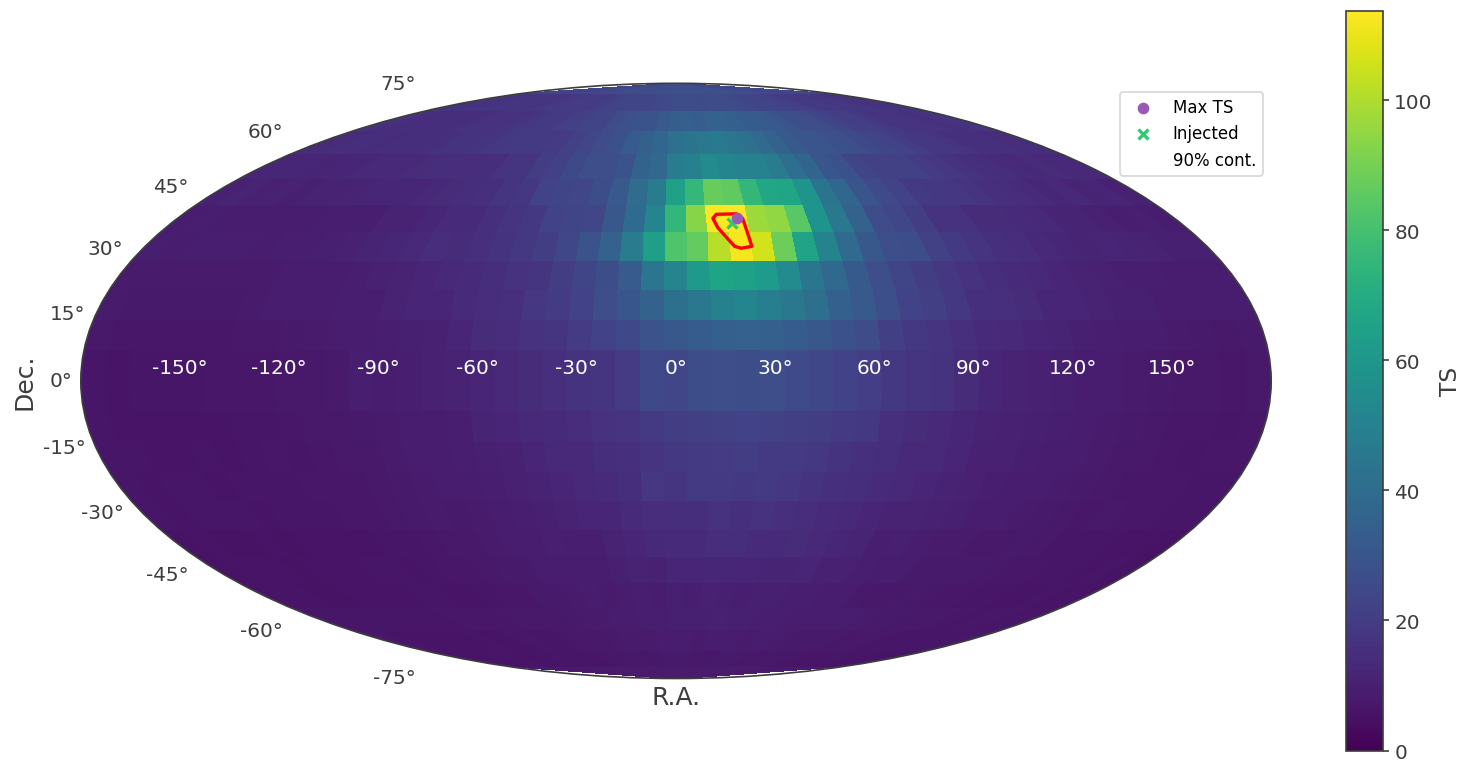

In [28]:
# Plotting
fig, ax = plt.subplots(figsize=(16, 8), subplot_kw={'projection': 'mollweide'}, dpi=120)

_,plot = ts.plot(ax, vmin = 0, colorbar = False, zorder=0)

ax.scatter([ts.axes['ra'].centers[argmax[0]]],[ts.axes['dec'].centers[argmax[1]]], label = "Max TS", zorder=3)

ax.scatter([20/180*np.pi],[40/180*np.pi], marker = "x", label = "Injected", zorder=2)

# Here we also use Wilk's theorem to find the DeltaTS that corresponse to a 90% containment confidence
ts_thresh = ts_max - stats.chi2.isf(1-.9, df = 2)
contours = ax.contour(ts.axes['ra'].centers, 
                      ts.axes['dec'].centers, 
                      ts.contents.transpose(), 
                      [ts_thresh], colors = 'red', zorder=1)
contours.collections[0].set_label("90% cont.")

cbar = fig.colorbar(plot)
cbar.ax.set_ylabel("TS")

ax.set_xlabel('R.A.', fontsize=15);
ax.set_ylabel('Dec.', fontsize=15);
ax.tick_params(axis='x', colors='White')
ax.legend(fontsize=10)